In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns
from matplotlib.pyplot import figure
import cmocean.cm as cmo
import seaborn as sns

from matplotlib.lines import Line2D
from geopy.distance import geodesic

from pylab import rcParams
from numpy import diff
from scipy import interpolate
import scipy.stats as stats

from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

import matplotlib.gridspec as gridspec

import cmocean
import cmocean.cm as cmo
import seaborn as sns

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:
df_o2 = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/O2_Summary_Stats.csv', sep=',', index_col=0)
df_riv = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/river_discharge_date.csv', sep=',', index_col=0)

flux_cdom_bc_350 = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_cdom_bc_350.csv', sep=',', index_col=0)
flux_cdom_bc_412 = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_cdom_bc_412.csv', sep=',', index_col=0)

flux_cdom_pw_350 = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_cdom_pw_350.csv', sep=',', index_col=0)
flux_cdom_pw_412 = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_cdom_pw_412.csv', sep=',', index_col=0)
flux_cdom_pw_320 = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_cdom_pw_320.csv', sep=',', index_col=0)
flux_cdom_pw_450 = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_cdom_pw_450.csv', sep=',', index_col=0)


flux_doc_bc = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_doc_bc.csv', sep=',', index_col=0)
flux_doc_pw = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_doc_pw.csv', sep=',', index_col=0)

flux_tn_bc = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_tn_bc.csv', sep=',', index_col=0)
flux_tn_pw = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_tn_pw.csv', sep=',', index_col=0)

flux_fe2_bc = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_fe2_bc.csv', sep=',', index_col=0)
flux_fe2_pw = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_fe2_pw.csv', sep=',', index_col=0)
flux_fe3_bc = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_fe3_bc.csv', sep=',', index_col=0)
flux_fe3_pw = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_fe3_pw.csv', sep=',', index_col=0)

fe_stocks = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Iron_stocks.csv', sep=',', index_col=0)
doc_stocks = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/DOC_stocks.csv', sep=',', index_col=0)


flux_inflection_bc = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_inflection_bc.csv', sep=',', index_col=0)

ncs_stocks = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/NCS_stocks.csv', sep=',', index_col=0)
wc_doc_stocks = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Water_col_DOC_stocks.csv', sep=',', index_col=0)

dic_flux = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/GOM_DIC_BFLUX_03052024.csv')
dic_flux['code'] = dic_flux['Stn'] + '_' + dic_flux['camp']
dic_flux.index = dic_flux['code']

################################


flux_cdom_bc_412_join = flux_cdom_bc_412['bc_flux_aCDOM412']
flux_cdom_bc_350_join = flux_cdom_bc_350['bc_flux_aCDOM350']

flux_cdom_pw_350_join = flux_cdom_pw_350['pw_flux_aCDOM350']
flux_cdom_pw_412_join = flux_cdom_pw_412['pw_flux_aCDOM412']
flux_cdom_pw_320_join = flux_cdom_pw_320['pw_flux_aCDOM320']
flux_cdom_pw_450_join = flux_cdom_pw_450['pw_flux_aCDOM450']


flux_doc_bc_join = flux_doc_bc['bc_flux_doc']

flux_doc_pw_join = flux_doc_pw['pw_flux_doc']
flux_doc_pw_error_join = flux_doc_pw['pw_flux_doc_error']

flux_tn_bc_join = flux_tn_bc['bc_flux_tn']

flux_tn_pw_join = flux_tn_pw['pw_flux_tn']
flux_tn_pw_error_join = flux_tn_pw['pw_flux_tn_error']

flux_fe2_bc_join = flux_fe2_bc['bc_flux_fe2']

flux_fe2_pw_join = flux_fe2_pw['pw_flux_fe2']
flux_fe2_pw_error_join = flux_fe2_pw['pw_flux_fe2_error']

flux_fe3_bc_join = flux_fe3_bc['bc_flux_fe3']

flux_fe3_pw_join = flux_fe3_pw['pw_flux_fe3']
flux_fe3_pw_error_join = flux_fe3_pw['pw_flux_fe3_error']

flux_dic_bc_join = dic_flux['dic_flux']

ncs_stocks['OCmol_5cm_deepM3'] = ncs_stocks['OCg_5cm_deep/M2'] / 12 
ncs_stocks['Cmol_5cm_deepM3'] = ncs_stocks['Cg_5cm_deep/M2'] / 12 
ncs_stocks['Nmol_5cm_deepM3'] = ncs_stocks['Ng_5cm_deep/M2'] / 14 
ncs_stocks['C:N_mol_5cm_deepM3'] = ncs_stocks['Cmol_5cm_deepM3'] / ncs_stocks['Ng_5cm_deep/M2'] 


fe_stocks_join = fe_stocks
df_riv = df_riv.drop(columns=['date'])
doc_stocks_join = doc_stocks

df = df_o2.join(ncs_stocks)
df = df.join(df_riv)
df = df.join(fe_stocks_join)
df = df.join(doc_stocks_join)
df = df.join(wc_doc_stocks)
df = df.join(flux_inflection_bc)

df = df.join(flux_cdom_bc_412_join)
df = df.join(flux_cdom_pw_412_join)

df = df.join(flux_cdom_pw_450_join)
df = df.join(flux_cdom_pw_320_join)

df = df.join(flux_cdom_bc_350_join)
df = df.join(flux_cdom_pw_350_join)

df = df.join(flux_doc_bc_join)
df = df.join(flux_doc_pw_join)
df = df.join(flux_doc_pw_error_join)

df = df.join(flux_tn_bc_join)
df = df.join(flux_tn_pw_join)
df = df.join(flux_tn_pw_error_join)

df = df.join(flux_fe2_bc_join)
df = df.join(flux_fe2_pw_join)
df = df.join(flux_fe2_pw_error_join)

df = df.join(flux_fe3_bc_join)
df = df.join(flux_fe3_pw_join)
df = df.join(flux_fe3_pw_error_join)

df = df.join(flux_dic_bc_join)


df['Camp'] = df["camp"]
df['Stn'] = df["station"]
df = df.drop(columns=['code.1'])

df['rgn'] = 'default'

df.loc[df['station'].isin(['St.2', 'St.16', 'St.16-2']), 'rgn'] = 'riv'
df.loc[df['station'].isin(['St.5B', 'St.MK', 'St.MK-2', 'St.ML', 'St.4', 'St.6']), 'rgn'] = 'hypox'
df.loc[df['station'].isin(['St.7', 'St.9', 'St.14', 'St.14.5']), 'rgn'] = 'shelf'
df.loc[df['station'].isin(['St.11', 'St.12', 'St.13', 'St.15']), 'rgn'] = 'slope'

df['season'] = 'default'

df.loc[df['camp'].isin(['GOM21FA']), 'season'] = 'fall'
df.loc[df['camp'].isin(['GOM22SU', 'GOM2021']), 'season'] = 'summer'
df.loc[df['camp'].isin(['GOM22SP']), 'season'] = 'spring'

df['OCkg_5cm_deep_M3'] = df['OCg_5cm_deep/M2'] / 1000
df['OCkg_25cm_deep_M3'] = df['OCg_5_25cm_deep/M2'] / 1000

df['Date'] = pd.to_datetime(df['date'])
df['day_of_year'] = df['Date'].dt.dayofyear

df['Fe2_m3'] = df['fe2_mol_per_m3_0_to_25cm']
df['Fe3_m3'] = df['fe3_mol_per_m3_0_to_25cm']

df['Fe2_m3_top'] = df['fe2_mol_per_m3_0_to_5cm']
df['Fe3_m3_top'] = df['fe3_mol_per_m3_0_to_5cm']

# Function to calculate distance
def calculate_distance(row):
    start = (row['latitude_bottom'], row['longitude_bottom'])
    end = (29.14805833, -89.24593056)  # Coordinates of delta
    return geodesic(start, end).kilometers

# Function to calculate distance
def calculate_lat_distance(row):
    start = (row['latitude_bottom'], row['longitude_bottom'])
    end = (29.14805833, row['longitude_bottom'])  
    return geodesic(start, end).kilometers

# Function to calculate distance
def calculate_lon_distance(row):
    start = (row['latitude_bottom'], row['longitude_bottom'])
    end = (row['latitude_bottom'], -89.24593056)  
    return geodesic(start, end).kilometers

# Apply function to create new column
df['distance_to_delta_km'] = df.apply(calculate_distance, axis=1)
df['distance_to_delta_lat_km'] = df.apply(calculate_lat_distance, axis=1)
df['distance_to_delta_lon_km'] = df.apply(calculate_lon_distance, axis=1)


df.to_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_Stock_O2_summary.csv')

In [3]:
df['Mix_depth_sal'] = 0 

df = df.sort_values(by='camp', ascending=False)
df = df.sort_values(by='station', ascending=False)

df

,camp,station,date,Max_pressure,Pressure_dbar_surface,O2_mgL_surface,latitude_surface,longitude_surface,Pressure_dbar_bottom,O2_mgL_bottom,...,Date,day_of_year,Fe2_m3,Fe3_m3,Fe2_m3_top,Fe3_m3_top,distance_to_delta_km,distance_to_delta_lat_km,distance_to_delta_lon_km,Mix_depth_sal
code,,,,,,,,,,,,,,,,,,,,,
St.ML_GOM2021,GOM2021,St.ML,2021-07-27,14.595,1.620,8.0049,28.97026,-90.32364,14.595,3.3575,...,2021-07-27,208,NaN,NaN,NaN,NaN,106.785503,19.711021,105.040553,0
St.MK-2_GOM21FA,GOM21FA,St.MK-2,2021-10-30,13.611,1.213,6.9518,28.95282,-90.32652,13.611,5.7639,...,2021-10-30,303,NaN,NaN,NaN,NaN,107.411427,21.650636,105.305824,0
St.MK_GOM22SU,GOM22SU,St.MK,2022-07-23,17.611,1.769,3.3567,28.90304,-90.30102,17.611,0.1302,...,2022-07-23,204,0.000464,0.018608,0.001017,0.059315,106.318319,27.152464,102.913883,0
St.MK_GOM2021,GOM2021,St.MK,2021-07-15,16.981,1.760,7.7042,28.90712,-90.33216,16.981,3.3798,...,2021-07-15,196,0.000389,0.002267,0.000911,0.008401,109.275356,26.749028,106.074011,0
St.MK_GOM22SP,GOM22SP,St.MK,2022-04-19,17.800,2.096,6.5844,28.90238,-90.30920,17.800,5.6998,...,2022-04-19,109,0.003522,0.009739,0.012711,0.037743,107.097089,27.227831,103.700640,0
St.MK_GOM21FA,GOM21FA,St.MK,2021-10-27,17.149,2.164,6.5030,28.91366,-90.32850,17.149,3.0065,...,2021-10-27,300,0.002940,0.021143,0.012133,0.069563,108.601600,25.970971,105.569525,0
St.9_GOM22SP,GOM22SP,St.9,2022-04-16,79.039,1.549,6.9312,28.78732,-89.60364,79.039,5.3415,...,2022-04-16,106,0.014157,0.032722,0.016359,0.024773,53.175232,39.984734,35.115336,0
St.9_GOM2021,GOM2021,St.9,2021-07-20,79.028,2.283,7.0499,28.79980,-89.59940,79.028,5.4915,...,2021-07-20,201,0.003485,0.043031,0.003682,0.015226,51.689436,38.601546,34.433630,0
St.9_GOM21FA,GOM21FA,St.9,2021-11-01,81.090,1.643,6.8313,28.78502,-89.59796,81.090,3.9828,...,2021-11-01,305,0.005614,0.039804,0.002640,0.015615,53.023468,40.348263,34.462243,0


In [4]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # Convert latitude and longitude from decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    radius = 6371  # Radius of the Earth in kilometers
    distance = radius * c
    return distance

def calculate_area(lat_top, lat_bot, lon_left, lon_right):
    """
    Calculate the area of a box defined by its latitude and longitude coordinates
    """
    # Calculate the distances between the latitude and longitude points
    width = haversine(lat_top, lon_left, lat_top, lon_right)
    height = haversine(lat_top, lon_left, lat_bot, lon_left)

    # Calculate the area
    area = width * height
    return area

# Coordinates of the box
lat_top = 29
lat_bot = 28
lon_left = -91.5
lon_right = -88.75

# Calculate and print the area
area_km2 = calculate_area(lat_top, lat_bot, lon_left, lon_right)
print("Area of the box:", round(area_km2, 2), "square kilometers")


Area of the box: 29738.02 square kilometers


In [5]:
mean = df['pw_flux_doc'].mean()
minim = df['pw_flux_doc'].min()
maxy = df['pw_flux_doc'].max()

print(f'DOC flux Mean mmol/m2/day: {mean}')
print(f'DOC flux Min mmol/m2/day: {minim}')
print(f'DOC flux Max mmol/m2/day: {maxy}')
print("")
mean = df['pw_flux_doc'].mean()
mean_mol_km_year = mean * 1e+6 * 365.25 / 1000
print('mean DOC flux times 10^6 to go from mmol/m2/day to mmol/km2/day')
print('DOC flux times 365 to go from mmol/km2/day to mmol/km2/year')
print('DOC flux devide 1000 to go from mmol/km2/year to mol/km2/year')
print(f'DOC flux mol/km2/year: {mean_mol_km_year}')
print("")

mean_terag_km_year = mean_mol_km_year * 12 / 1e+12
print('DOC flux times 12 to go from mol/km2/year to g/km2/year')
print('DOC flux devide 10^12 to go from g/km2/year to Tg/km2/year')

print(f'DOC flux TG/year/km: {mean_terag_km_year}')
mean_terag_year = mean_terag_km_year * area_km2
print("")
print(f'the area of our study site is:', round(area_km2, 2) , "square kilometers")
print('DOC flux times our study site area to go from Tg/km2/year to Tg/nGOM/year')
print("")
print(f'DOC flux TG/year in nGOM: {mean_terag_year}')

print("")
print("")
print("")
print("")

mean = df['pw_flux_doc'].min()
mean_mol_km_year = mean * 1e+6 * 365.25 / 1000
print('min DOC flux times 10^6 to go from mmol/m2/day to mmol/km2/day')
print('DOC flux times 365 to go from mmol/km2/day to mmol/km2/year')
print('DOC flux devide 1000 to go from mmol/km2/year to mol/km2/year')
print(f'DOC flux mol/km2/year: {mean_mol_km_year}')
print("")

mean_terag_km_year = mean_mol_km_year * 12 / 1e+12
print('DOC flux times 12 to go from mol/km2/year to g/km2/year')
print('DOC flux devide 10^12 to go from g/km2/year to Tg/km2/year')

print(f'DOC flux TG/year/km: {mean_terag_km_year}')
mean_terag_year = mean_terag_km_year * area_km2
print("")
print(f'the area of our study site is:', round(area_km2, 2) , "square kilometers")
print('DOC flux times our study site area to go from Tg/km2/year to Tg/nGOM/year')
print("")
print(f'DOC flux TG/year in nGOM min: {mean_terag_year}')

print("")
print("")
print("")
print("")


mean = df['pw_flux_doc'].max()
mean_mol_km_year = mean * 1e+6 * 365.25 / 1000
print('max DOC flux times 10^6 to go from mmol/m2/day to mmol/km2/day')
print('DOC flux times 365 to go from mmol/km2/day to mmol/km2/year')
print('DOC flux devide 1000 to go from mmol/km2/year to mol/km2/year')
print(f'DOC flux mol/km2/year: {mean_mol_km_year}')
print("")

mean_terag_km_year = mean_mol_km_year * 12 / 1e+12
print('DOC flux times 12 to go from mol/km2/year to g/km2/year')
print('DOC flux devide 10^12 to go from g/km2/year to Tg/km2/year')

print(f'DOC flux TG/year/km: {mean_terag_km_year}')
mean_terag_year = mean_terag_km_year * area_km2
print("")
print(f'the area of our study site is:', round(area_km2, 2) , "square kilometers")
print('DOC flux times our study site area to go from Tg/km2/year to Tg/nGOM/year')
print("")
print(f'DOC flux TG/year in nGOM max: {mean_terag_year}')

DOC flux Mean mmol/m2/day: 0.4992800997393524
DOC flux Min mmol/m2/day: 0.0469158749319804
DOC flux Max mmol/m2/day: 1.2995180893955702

mean DOC flux times 10^6 to go from mmol/m2/day to mmol/km2/day
DOC flux times 365 to go from mmol/km2/day to mmol/km2/year
DOC flux devide 1000 to go from mmol/km2/year to mol/km2/year
DOC flux mol/km2/year: 182362.05642979848

DOC flux times 12 to go from mol/km2/year to g/km2/year
DOC flux devide 10^12 to go from g/km2/year to Tg/km2/year
DOC flux TG/year/km: 2.1883446771575816e-06

the area of our study site is: 29738.02 square kilometers
DOC flux times our study site area to go from Tg/km2/year to Tg/nGOM/year

DOC flux TG/year in nGOM: 0.06507704511735658




min DOC flux times 10^6 to go from mmol/m2/day to mmol/km2/day
DOC flux times 365 to go from mmol/km2/day to mmol/km2/year
DOC flux devide 1000 to go from mmol/km2/year to mol/km2/year
DOC flux mol/km2/year: 17136.02331890584

DOC flux times 12 to go from mol/km2/year to g/km2/year
DOC flux

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_13288\1163569407.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=group_label_map.keys(), ax=axes.flatten()[i],
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_13288\1163569407.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.flatten()[i].set_xticklabels([group_label_map[x.get_text()] for x in axes.flatten()[i].get_xticklabels()])
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_13288\1163569407.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=group_

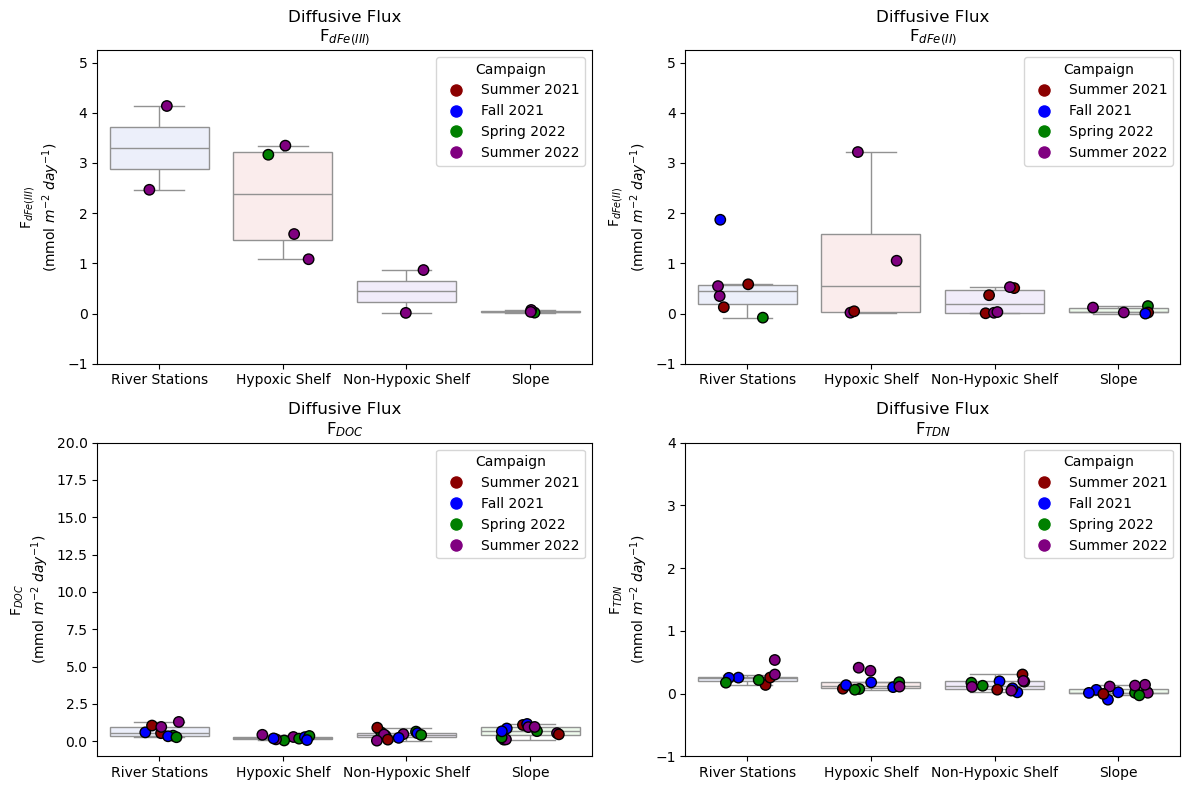

In [6]:
# Define custom colors and labels
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

group_label_map_seas = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

color_map_rgn = {
    'hypox': '#FCEAEA',
    'riv': '#EAEEFC',
    'slope': '#ECFCEA',
    'shelf': '#F1EAFC'
}

group_label_map = {
    'riv': 'River Stations',
    'hypox': 'Hypoxic Shelf',
    'shelf': 'Non-Hypoxic Shelf',
    'slope': 'Slope'
}

variable_label_map = {
    'pw_flux_doc': r'F$_{DOC}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe3': r'F$_{dFe(III)}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe2': r'F$_{dFe(II)}$'+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_tn': r'F$_{TDN}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
}

variable_title_map = {
    'pw_flux_doc': 'Diffusive Flux'+'\n'+ r'F$_{DOC}$',
    'pw_flux_fe3': 'Diffusive Flux'+'\n'+r'F$_{dFe(III)}$',
    'pw_flux_fe2': 'Diffusive Flux'+'\n'+ r'F$_{dFe(II)}$',
    'pw_flux_tn': 'Diffusive Flux'+'\n'+ r'F$_{TDN}$'
}

variable_limits = {
    'pw_flux_doc': (-1, 20), 
    'pw_flux_fe3': (-1, 5.25),
    'pw_flux_fe2': (-1, 5.25),
    'pw_flux_tn': (-1, 4)  # corrected the extra comma
}

# Specify the variables to plot
variables_to_plot = ["pw_flux_fe3", "pw_flux_fe2","pw_flux_doc", "pw_flux_tn"]

# Create a boxplot for each variable in a subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns

# Loop through variables and create boxplots
for i, var in enumerate(variables_to_plot):
    sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=group_label_map.keys(), ax=axes.flatten()[i], 
               flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
    sns.stripplot(data=df, x='rgn', y=var, hue='Camp', jitter=0.25, order=group_label_map.keys(), ax=axes.flatten()[i],
                  size = 7.5, linewidth = 1.0, edgecolor = 'black', palette=color_map)
    axes.flatten()[i].set_title(variable_title_map[var])  # Set title
    axes.flatten()[i].set_xlabel("")  # Remove x-axis label
    axes.flatten()[i].set_ylabel(variable_label_map[var])  # Remove y-axis label
    
    # Set custom labels for x-axis ticks
    axes.flatten()[i].set_xticklabels([group_label_map[x.get_text()] for x in axes.flatten()[i].get_xticklabels()])
    

legend_handles = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in color_map.items()]
    
# Set y-axis labels and limits
for i, var in enumerate(variables_to_plot):
    ax = axes.flatten()[i]
    ax.set_ylabel(variable_label_map[var])
    ax.set_ylim(variable_limits[var])  # Set y-axis limits
    ax.legend(title='Campaign', handles=legend_handles, labels=group_label_map_seas.values(), loc='upper right')


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\hmlbr\AppData\Local\Temp\ipykernel_13288\2316420668.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=group_label_map.keys(), ax=axes,
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_13288\2316420668.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels([group_label_map[x.get_text()] for x in axes.get_xticklabels()])


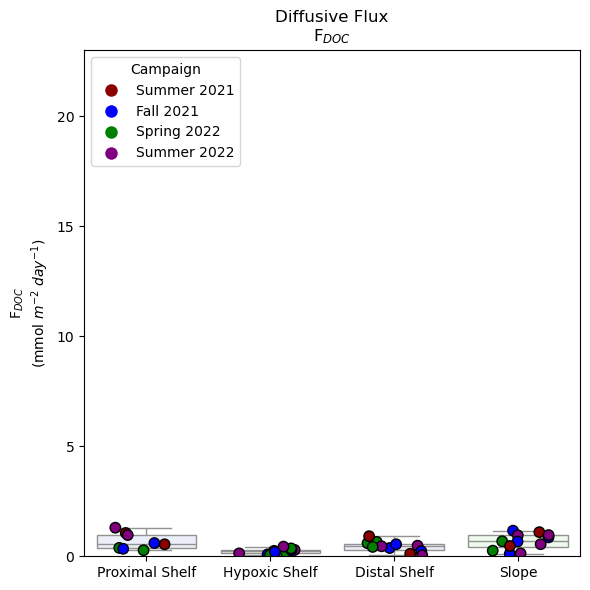

In [7]:
# Define custom colors and labels
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

group_label_map_seas = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

color_map_rgn = {
    'hypox': '#FCEAEA',
    'riv': '#EAEEFC',
    'slope': '#ECFCEA',
    'shelf': '#F1EAFC'
}

group_label_map = {
    'riv': 'Proximal Shelf',
    'hypox': 'Hypoxic Shelf',
    'shelf': 'Distal Shelf',
    'slope': 'Slope'
}

variable_label_map = {
    'pw_flux_doc': r'F$_{DOC}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe3': r'F$_{dFe(III)}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe2': r'F$_{dFe(II)}$'+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_tn': r'F$_{TDN}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
}

variable_title_map = {
    'pw_flux_doc': 'Diffusive Flux'+'\n'+ r'F$_{DOC}$',
    'pw_flux_fe3': 'Diffusive Flux'+'\n'+r'F$_{dFe(III)}$',
    'pw_flux_fe2': 'Diffusive Flux'+'\n'+ r'F$_{dFe(II)}$',
    'pw_flux_tn': 'Diffusive Flux'+'\n'+ r'F$_{TDN}$'
}

variable_limits = {
    'pw_flux_doc': (0, 23), 
    'pw_flux_fe3': (-1, 5.25),
    'pw_flux_fe2': (-1, 5.25),
    'pw_flux_tn': (-1, 4)  # corrected the extra comma
}


var = 'pw_flux_doc'

# Create a boxplot for each variable in a subplot
fig, axes = plt.subplots(1, 1, figsize=(6, 6)) 

# Loop through variables and create boxplots
sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=group_label_map.keys(), ax=axes,
            flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(data=df, x='rgn', y=var, hue='Camp', jitter=0.25, order=group_label_map.keys(), ax=axes,
                size = 7.5, linewidth = 1.0, edgecolor = 'black', palette=color_map)
axes.set_title(variable_title_map[var])  # Set title
axes.set_xlabel("")  # Remove x-axis label
axes.set_ylabel(variable_label_map[var])  # Remove y-axis label
axes.set_ylim(variable_limits[var])
    
axes.set_xticklabels([group_label_map[x.get_text()] for x in axes.get_xticklabels()])

legend_handles = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in color_map.items()]
axes.legend(title='Campaign', handles=legend_handles, labels=group_label_map_seas.values(), loc='upper left')

# Adjust layout
plt.tight_layout()

plt.savefig(f'../Dissertation_projects/Figures/Flux_figures/DOC_flux_box_plot_rgn.png')

# Show the plot
plt.show()

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_13288\113719958.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=group_label_map.keys(), ax=axes,
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_13288\113719958.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels([group_label_map[x.get_text()] for x in axes.get_xticklabels()])


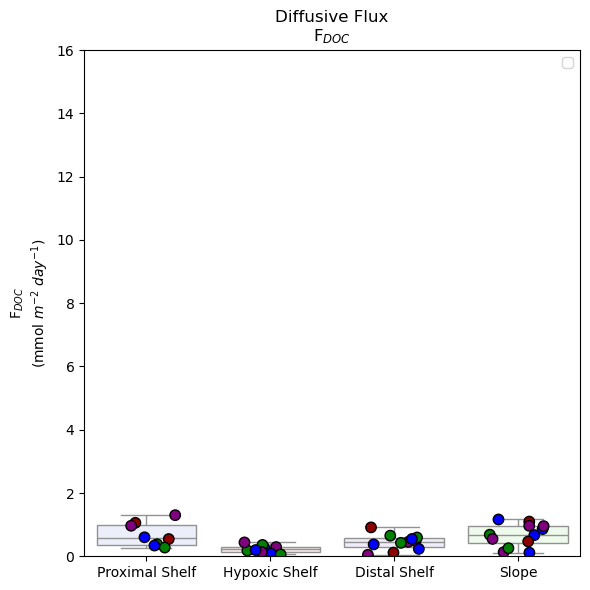

In [8]:
# Define custom colors and labels
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

group_label_map_seas = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

color_map_rgn = {
    'hypox': '#FCEAEA',
    'riv': '#EAEEFC',
    'slope': '#ECFCEA',
    'shelf': '#F1EAFC'
}

group_label_map = {
    'riv': 'Proximal Shelf',
    'hypox': 'Hypoxic Shelf',
    'shelf': 'Distal Shelf',
    'slope': 'Slope'
}

variable_label_map = {
    'pw_flux_doc': r'F$_{DOC}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe3': r'F$_{dFe(III)}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe2': r'F$_{dFe(II)}$'+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_tn': r'F$_{TDN}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
}

variable_title_map = {
    'pw_flux_doc': 'Diffusive Flux'+'\n'+ r'F$_{DOC}$',
    'pw_flux_fe3': 'Diffusive Flux'+'\n'+r'F$_{dFe(III)}$',
    'pw_flux_fe2': 'Diffusive Flux'+'\n'+ r'F$_{dFe(II)}$',
    'pw_flux_tn': 'Diffusive Flux'+'\n'+ r'F$_{TDN}$'
}

variable_limits = {
    'pw_flux_doc': (0, 16), 
    'pw_flux_fe3': (-1, 5.25),
    'pw_flux_fe2': (-1, 5.25),
    'pw_flux_tn': (-1, 4)  # corrected the extra comma
}


var = 'pw_flux_doc'

# Create a boxplot for each variable in a subplot
fig, axes = plt.subplots(1, 1, figsize=(6, 6)) 

# Loop through variables and create boxplots
sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=group_label_map.keys(), ax=axes,
            flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(data=df, x='rgn', y=var, hue='Camp', jitter=0.25, order=group_label_map.keys(), ax=axes,
                size = 7.5, linewidth = 1.0, edgecolor = 'black', palette=color_map)
axes.set_title(variable_title_map[var])  # Set title
axes.set_xlabel("")  # Remove x-axis label
axes.set_ylabel(variable_label_map[var])  # Remove y-axis label
axes.set_ylim(variable_limits[var])
    
axes.set_xticklabels([group_label_map[x.get_text()] for x in axes.get_xticklabels()])

axes.legend('')

# Adjust layout
plt.tight_layout()

plt.savefig(f'../Dissertation_projects/Figures/Flux_figures/DOC_flux_box_plot_rgn.png')

# Show the plot
plt.show()

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_13288\3414568768.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=custom_order, ax=axes,
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_13288\3414568768.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels([group_label_map[x.get_text()] for x in axes.get_xticklabels()])


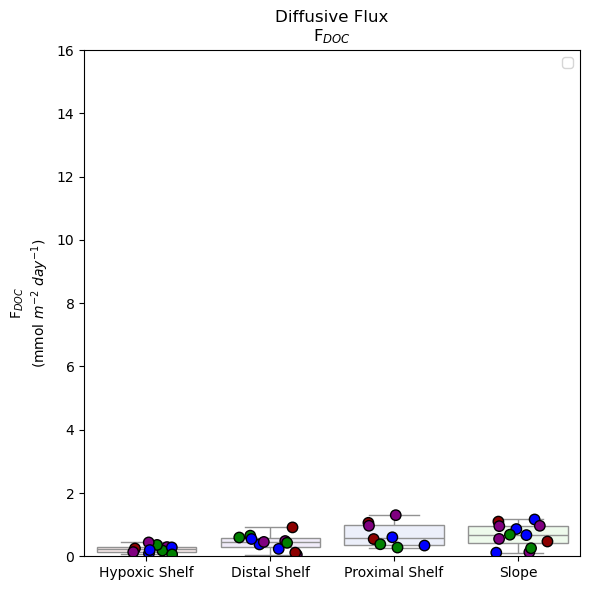

In [9]:
# Define custom order for boxplots
custom_order = ['hypox', 'shelf', 'riv', 'slope']

# Create a boxplot for each variable in a subplot
fig, axes = plt.subplots(1, 1, figsize=(6, 6)) 

# Loop through variables and create boxplots
sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=custom_order, ax=axes,
            flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(data=df, x='rgn', y=var, hue='Camp', jitter=0.25, order=custom_order, ax=axes,
                size=7.5, linewidth=1.0, edgecolor='black', palette=color_map)

# Set title, labels, and limits
axes.set_title(variable_title_map[var])  # Set title
axes.set_xlabel("")  # Remove x-axis label
axes.set_ylabel(variable_label_map[var])  # Set y-axis label
axes.set_ylim(variable_limits[var])

# Update x-axis labels according to the new order
axes.set_xticklabels([group_label_map[x.get_text()] for x in axes.get_xticklabels()])

# Remove the legend
axes.legend('')

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig(f'../Dissertation_projects/Figures/Flux_figures/DOC_flux_box_plot_rgn.png')

# Show the plot
plt.show()


C:\Users\hmlbr\AppData\Local\Temp\ipykernel_13288\493654452.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=custom_order, ax=axes,
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_13288\493654452.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels([group_label_map[x.get_text()] for x in axes.get_xticklabels()])


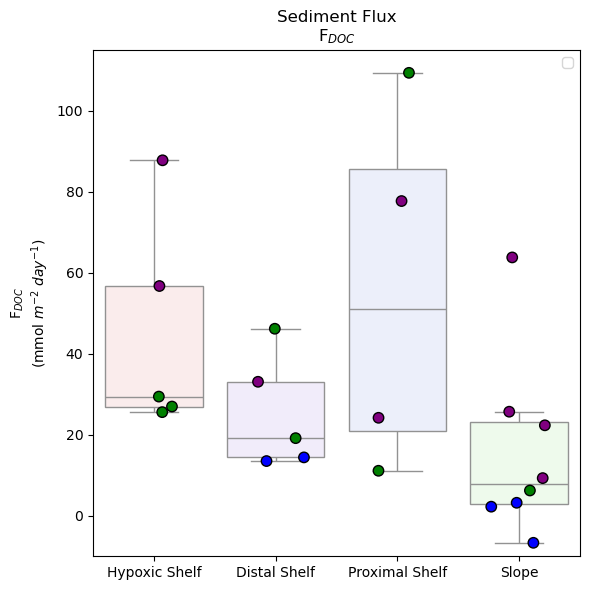

In [10]:
# Define custom colors and labels
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

group_label_map_seas = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

color_map_rgn = {
    'hypox': '#FCEAEA',
    'riv': '#EAEEFC',
    'slope': '#ECFCEA',
    'shelf': '#F1EAFC'
}

group_label_map = {
    'riv': 'Proximal Shelf',
    'hypox': 'Hypoxic Shelf',
    'shelf': 'Distal Shelf',
    'slope': 'Slope'
}

variable_label_map = {
    'bc_flux_doc': r'F$_{DOC}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe3': r'F$_{dFe(III)}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe2': r'F$_{dFe(II)}$'+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_tn': r'F$_{TDN}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
}

variable_title_map = {
    'bc_flux_doc': 'Sediment Flux'+'\n'+ r'F$_{DOC}$',
    'pw_flux_fe3': 'Diffusive Flux'+'\n'+r'F$_{dFe(III)}$',
    'pw_flux_fe2': 'Diffusive Flux'+'\n'+ r'F$_{dFe(II)}$',
    'pw_flux_tn': 'Diffusive Flux'+'\n'+ r'F$_{TDN}$'
}

variable_limits = {
    'bc_flux_doc': (-10, 115), 
    'pw_flux_fe3': (-1, 5.25),
    'pw_flux_fe2': (-1, 5.25),
    'pw_flux_tn': (-1, 4)  # corrected the extra comma
}


var = 'bc_flux_doc'

# Define custom order for boxplots
custom_order = ['hypox', 'shelf', 'riv', 'slope']

# Create a boxplot for each variable in a subplot
fig, axes = plt.subplots(1, 1, figsize=(6, 6)) 

# Loop through variables and create boxplots
sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=custom_order, ax=axes,
            flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(data=df, x='rgn', y=var, hue='Camp', jitter=0.25, order=custom_order, ax=axes,
                size=7.5, linewidth=1.0, edgecolor='black', palette=color_map)

# Set title, labels, and limits
axes.set_title(variable_title_map[var])  # Set title
axes.set_xlabel("")  # Remove x-axis label
axes.set_ylabel(variable_label_map[var])  # Set y-axis label
axes.set_ylim(variable_limits[var])

# Update x-axis labels according to the new order
axes.set_xticklabels([group_label_map[x.get_text()] for x in axes.get_xticklabels()])

# Remove the legend
axes.legend('')

# Adjust layout and save the plot
plt.tight_layout()
#plt.savefig(f'../Dissertation_projects/Figures/Flux_figures/DOC_flux_box_plot_rgn.png')

# Show the plot
plt.show()


In [11]:
df['pw_flux_doc']

code
St.ML_GOM2021           NaN
St.MK-2_GOM21FA         NaN
St.MK_GOM22SU      0.290393
St.MK_GOM2021      0.246924
St.MK_GOM22SP      0.180592
St.MK_GOM21FA      0.280657
St.9_GOM22SP       0.651871
St.9_GOM2021            NaN
St.9_GOM21FA       0.374725
St.9_GOM22SU       0.481890
St.7_GOM22SP       0.593131
St.7_GOM2021       0.912947
St.7_GOM21FA       0.233750
St.7_GOM22SU       0.453696
St.6_GOM21FA            NaN
St.5B_GOM22SP      0.358571
St.5B_GOM21FA      0.086706
St.5B_GOM22SU      0.438142
St.5B_GOM2021           NaN
St.4_GOM2021            NaN
St.4_GOM22SP       0.058522
St.4_GOM22SU       0.132255
St.4_GOM21FA       0.196937
St.2_GOM2021       0.545149
St.2_GOM22SP       0.380454
St.2_GOM22SU       1.299518
St.2_GOM21FA       0.600260
St.16-2_GOM21FA         NaN
St.16_GOM2021      1.057739
St.16_GOM22SU      0.964561
St.16_GOM21FA      0.339126
St.16_GOM22SP      0.275817
St.15_GOM21FA      0.860536
St.15_GOM22SP      0.682081
St.15_GOM2021      1.096442
St.15_GOM22SU  

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_13288\1569062800.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=group_label_map.keys(), ax=axes,
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_13288\1569062800.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels([group_label_map[x.get_text()] for x in axes.get_xticklabels()])


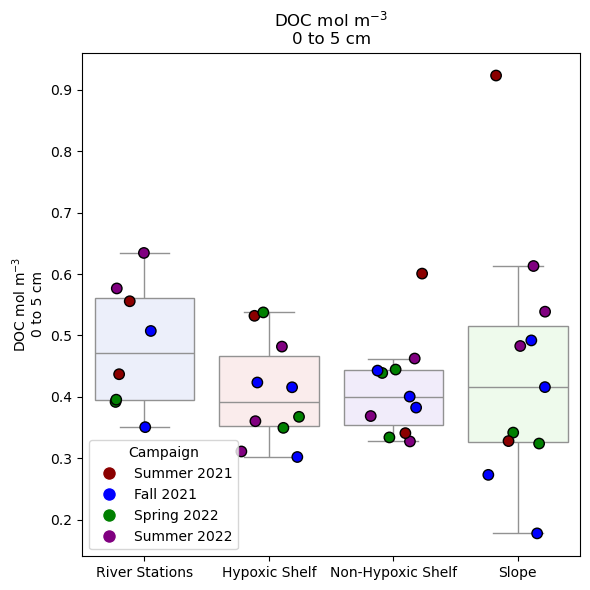

In [12]:
# Define custom colors and labels
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

group_label_map_seas = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

color_map_rgn = {
    'hypox': '#FCEAEA',
    'riv': '#EAEEFC',
    'slope': '#ECFCEA',
    'shelf': '#F1EAFC'
}

group_label_map = {
    'riv': 'River Stations',
    'hypox': 'Hypoxic Shelf',
    'shelf': 'Non-Hypoxic Shelf',
    'slope': 'Slope'
}

variable_label_map = {
    'pw_flux_doc': r'F$_{DOC}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe3': r'F$_{dFe(III)}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe2': r'F$_{dFe(II)}$'+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'doc_mol_per_m3_0_to_5cm': 'DOC mol m$^{-3}$'+'\n'+ '0 to 5 cm'
}

variable_title_map = {
    'pw_flux_doc': 'Diffusive Flux'+'\n'+ r'F$_{DOC}$',
    'pw_flux_fe3': 'Diffusive Flux'+'\n'+r'F$_{dFe(III)}$',
    'pw_flux_fe2': 'Diffusive Flux'+'\n'+ r'F$_{dFe(II)}$',
    'doc_mol_per_m3_0_to_5cm': 'DOC mol m$^{-3}$'+'\n'+ '0 to 5 cm'
}

variable_limits = {
    'pw_flux_doc': (-1, 30), 
    'pw_flux_fe3': (-1, 5.25),
    'pw_flux_fe2': (-1, 5.25),
    'doc_mol_per_m3_0_to_5cm': (0, 1)  # corrected the extra comma
}


var = 'doc_mol_per_m3_0_to_5cm'

# Create a boxplot for each variable in a subplot
fig, axes = plt.subplots(1, 1, figsize=(6, 6)) 

# Loop through variables and create boxplots
sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=group_label_map.keys(), ax=axes,
            flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(data=df, x='rgn', y=var, hue='Camp', jitter=0.25, order=group_label_map.keys(), ax=axes,
                size = 7.5, linewidth = 1.0, edgecolor = 'black', palette=color_map)
axes.set_title(variable_title_map[var])  # Set title
axes.set_xlabel("")  # Remove x-axis label
axes.set_ylabel(variable_label_map[var])  # Remove y-axis label
    
axes.set_xticklabels([group_label_map[x.get_text()] for x in axes.get_xticklabels()])

legend_handles = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in color_map.items()]
axes.legend(title='Campaign', handles=legend_handles, labels=group_label_map_seas.values(), loc='lower left')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_13288\2687699769.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=group_label_map.keys(), ax=axes,
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_13288\2687699769.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels([group_label_map[x.get_text()] for x in axes.get_xticklabels()])


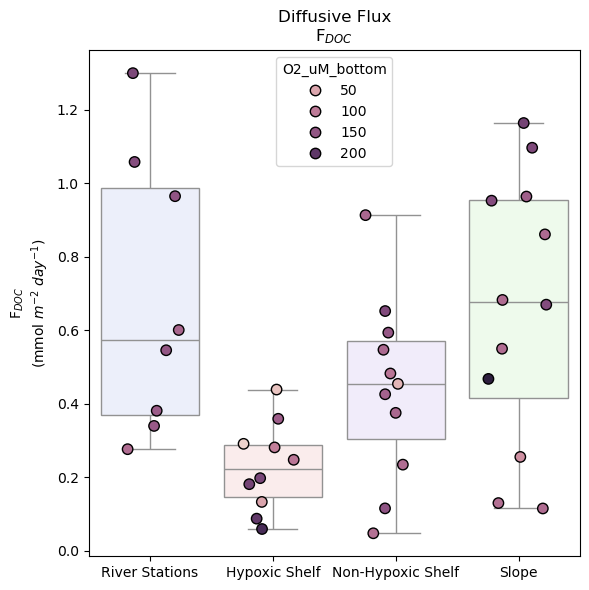

In [13]:
# Define custom colors and labels
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

group_label_map_seas = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

color_map_rgn = {
    'hypox': '#FCEAEA',
    'riv': '#EAEEFC',
    'slope': '#ECFCEA',
    'shelf': '#F1EAFC'
}

group_label_map = {
    'riv': 'River Stations',
    'hypox': 'Hypoxic Shelf',
    'shelf': 'Non-Hypoxic Shelf',
    'slope': 'Slope'
}

variable_label_map = {
    'pw_flux_doc': r'F$_{DOC}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe3': r'F$_{dFe(III)}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe2': r'F$_{dFe(II)}$'+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_tn': r'F$_{TDN}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
}

variable_title_map = {
    'pw_flux_doc': 'Diffusive Flux'+'\n'+ r'F$_{DOC}$',
    'pw_flux_fe3': 'Diffusive Flux'+'\n'+r'F$_{dFe(III)}$',
    'pw_flux_fe2': 'Diffusive Flux'+'\n'+ r'F$_{dFe(II)}$',
    'pw_flux_tn': 'Diffusive Flux'+'\n'+ r'F$_{TDN}$'
}

variable_limits = {
    'pw_flux_doc': (-1, 30), 
    'pw_flux_fe3': (-1, 5.25),
    'pw_flux_fe2': (-1, 5.25),
    'pw_flux_tn': (-1, 4)  # corrected the extra comma
}

marker_map = {
    'GOM2021': 'o',
    'GOM21FA': 'p',
    'GOM22SP': 'D',
    'GOM22SU': '8'
}


var = 'pw_flux_doc'


# Create a boxplot for each variable in a subplot
fig, axes = plt.subplots(1, 1, figsize=(6, 6)) 

# Loop through variables and create boxplots
sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=group_label_map.keys(), ax=axes,
            flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(data=df, x='rgn', y=var, hue='O2_uM_bottom', jitter=0.25, order=group_label_map.keys(), ax=axes,
                size = 7.5, linewidth = 1.0, edgecolor = 'black')
axes.set_title(variable_title_map[var])  # Set title
axes.set_xlabel("")  # Remove x-axis label
axes.set_ylabel(variable_label_map[var])  # Remove y-axis label
    
axes.set_xticklabels([group_label_map[x.get_text()] for x in axes.get_xticklabels()])

#legend_handles = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in color_map.items()]
#axes.legend(title='Campaign', handles=legend_handles, labels=group_label_map_seas.values(), loc='lower left')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_13288\4044161356.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=group_label_map.keys(), ax=axes,
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_13288\4044161356.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels([group_label_map[x.get_text()] for x in axes.get_xticklabels()])


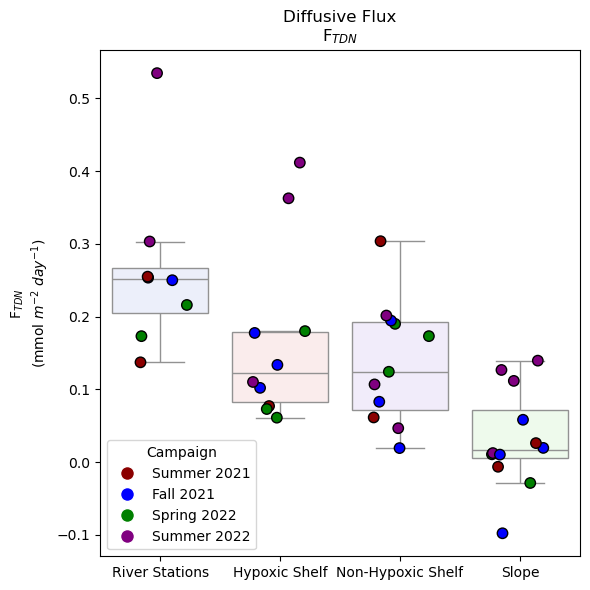

In [14]:
# Define custom colors and labels
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

group_label_map_seas = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

color_map_rgn = {
    'hypox': '#FCEAEA',
    'riv': '#EAEEFC',
    'slope': '#ECFCEA',
    'shelf': '#F1EAFC'
}

group_label_map = {
    'riv': 'River Stations',
    'hypox': 'Hypoxic Shelf',
    'shelf': 'Non-Hypoxic Shelf',
    'slope': 'Slope'
}

variable_label_map = {
    'pw_flux_doc': r'F$_{DOC}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe3': r'F$_{dFe(III)}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe2': r'F$_{dFe(II)}$'+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_tn': r'F$_{TDN}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
}

variable_title_map = {
    'pw_flux_doc': 'Diffusive Flux'+'\n'+ r'F$_{DOC}$',
    'pw_flux_fe3': 'Diffusive Flux'+'\n'+r'F$_{dFe(III)}$',
    'pw_flux_fe2': 'Diffusive Flux'+'\n'+ r'F$_{dFe(II)}$',
    'pw_flux_tn': 'Diffusive Flux'+'\n'+ r'F$_{TDN}$'
}

variable_limits = {
    'pw_flux_doc': (-1, 40), 
    'pw_flux_fe3': (-1, 5.25),
    'pw_flux_fe2': (-1, 5.25),
    'pw_flux_tn': (-1, 5)  # corrected the extra comma
}


var = 'pw_flux_tn'

# Create a boxplot for each variable in a subplot
fig, axes = plt.subplots(1, 1, figsize=(6, 6)) 

# Loop through variables and create boxplots
sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=group_label_map.keys(), ax=axes,
            flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(data=df, x='rgn', y=var, hue='Camp', jitter=0.25, order=group_label_map.keys(), ax=axes,
                size = 7.5, linewidth = 1.0, edgecolor = 'black', palette=color_map)
axes.set_title(variable_title_map[var])  # Set title
axes.set_xlabel("")  # Remove x-axis label
axes.set_ylabel(variable_label_map[var])  # Remove y-axis label
    
axes.set_xticklabels([group_label_map[x.get_text()] for x in axes.get_xticklabels()])

legend_handles = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in color_map.items()]
axes.legend(title='Campaign', handles=legend_handles, labels=group_label_map_seas.values(), loc='lower left')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_13288\1214965063.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=group_label_map.keys(), ax=axes,
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_13288\1214965063.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels([group_label_map[x.get_text()] for x in axes.get_xticklabels()])


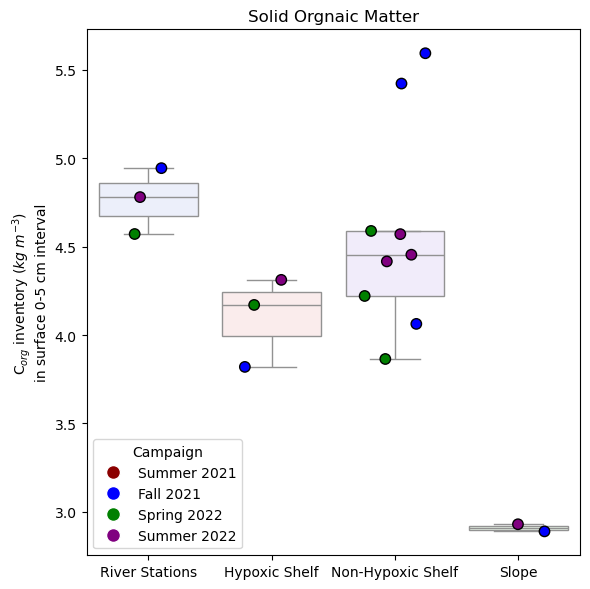

In [15]:
# Define custom colors and labels
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

group_label_map_seas = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

color_map_rgn = {
    'hypox': '#FCEAEA',
    'riv': '#EAEEFC',
    'slope': '#ECFCEA',
    'shelf': '#F1EAFC'
}

group_label_map = {
    'riv': 'River Stations',
    'hypox': 'Hypoxic Shelf',
    'shelf': 'Non-Hypoxic Shelf',
    'slope': 'Slope'
}

variable_label_map = {
    'OCkg_5cm_deep_M3': r'C$_{org}$ inventory $(kg$ $m^{-3})$'+'\n'+ 'in surface 0-5 cm interval',
    'pw_flux_fe3': r'F$_{dFe(III)}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe2': r'F$_{dFe(II)}$'+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_tn': r'F$_{TDN}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
}

variable_title_map = {
    'OCkg_5cm_deep_M3': 'Solid Orgnaic Matter',
    'pw_flux_fe3': 'Diffusive Flux'+'\n'+r'F$_{dFe(III)}$',
    'pw_flux_fe2': 'Diffusive Flux'+'\n'+ r'F$_{dFe(II)}$',
    'pw_flux_tn': 'Diffusive Flux'+'\n'+ r'F$_{TDN}$'
}

variable_limits = {
    'OCkg_5cm_deep_M3': (0, 1500), 
    'pw_flux_fe3': (-1, 5.25),
    'pw_flux_fe2': (-1, 5.25),
    'pw_flux_tn': (-1, 5)  # corrected the extra comma
}


var = 'OCkg_5cm_deep_M3'

# Create a boxplot for each variable in a subplot
fig, axes = plt.subplots(1, 1, figsize=(6, 6)) 

# Loop through variables and create boxplots
sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=group_label_map.keys(), ax=axes,
            flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(data=df, x='rgn', y=var, hue='Camp', jitter=0.25, order=group_label_map.keys(), ax=axes,
                size = 7.5, linewidth = 1.0, edgecolor = 'black', palette=color_map)
axes.set_title(variable_title_map[var])  # Set title
axes.set_xlabel("")  # Remove x-axis label
axes.set_ylabel(variable_label_map[var])  # Remove y-axis label
    
axes.set_xticklabels([group_label_map[x.get_text()] for x in axes.get_xticklabels()])

legend_handles = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in color_map.items()]
axes.legend(title='Campaign', handles=legend_handles, labels=group_label_map_seas.values(), loc='lower left')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_13288\1482225125.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=group_label_map.keys(), ax=axes,
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_13288\1482225125.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels([group_label_map[x.get_text()] for x in axes.get_xticklabels()])


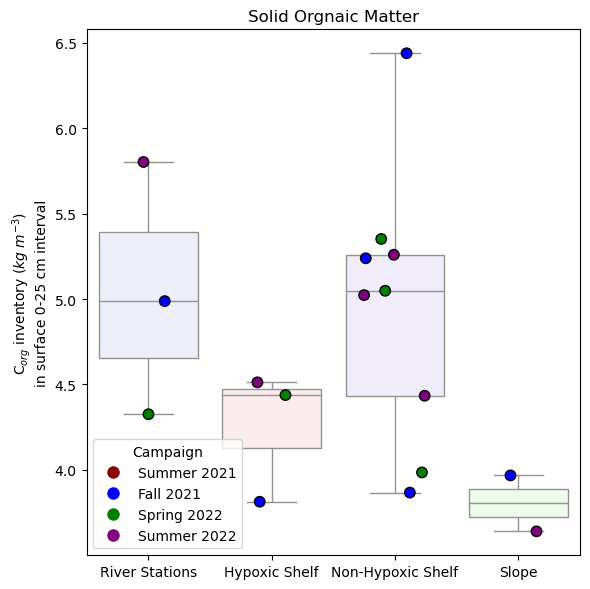

In [16]:
# Define custom colors and labels
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

group_label_map_seas = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

color_map_rgn = {
    'hypox': '#FCEAEA',
    'riv': '#EAEEFC',
    'slope': '#ECFCEA',
    'shelf': '#F1EAFC'
}

group_label_map = {
    'riv': 'River Stations',
    'hypox': 'Hypoxic Shelf',
    'shelf': 'Non-Hypoxic Shelf',
    'slope': 'Slope'
}

variable_label_map = {
    'OCkg_25cm_deep_M3': r'C$_{org}$ inventory $(kg$ $m^{-3})$'+'\n'+ 'in surface 0-25 cm interval',
    'pw_flux_fe3': r'F$_{dFe(III)}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe2': r'F$_{dFe(II)}$'+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_tn': r'F$_{TDN}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
}

variable_title_map = {
    'OCkg_25cm_deep_M3': 'Solid Orgnaic Matter',
    'pw_flux_fe3': 'Diffusive Flux'+'\n'+r'F$_{dFe(III)}$',
    'pw_flux_fe2': 'Diffusive Flux'+'\n'+ r'F$_{dFe(II)}$',
    'pw_flux_tn': 'Diffusive Flux'+'\n'+ r'F$_{TDN}$'
}

variable_limits = {
    'OCkg_25cm_deep_M3': (0, 1500), 
    'pw_flux_fe3': (-1, 5.25),
    'pw_flux_fe2': (-1, 5.25),
    'pw_flux_tn': (-1, 5)  # corrected the extra comma
}


var = 'OCkg_25cm_deep_M3'

# Create a boxplot for each variable in a subplot
fig, axes = plt.subplots(1, 1, figsize=(6, 6)) 

# Loop through variables and create boxplots
sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=group_label_map.keys(), ax=axes,
            flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(data=df, x='rgn', y=var, hue='Camp', jitter=0.25, order=group_label_map.keys(), ax=axes,
                size = 7.5, linewidth = 1.0, edgecolor = 'black', palette=color_map)
axes.set_title(variable_title_map[var])  # Set title
axes.set_xlabel("")  # Remove x-axis label
axes.set_ylabel(variable_label_map[var])  # Remove y-axis label
    
axes.set_xticklabels([group_label_map[x.get_text()] for x in axes.get_xticklabels()])

legend_handles = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in color_map.items()]
axes.legend(title='Campaign', handles=legend_handles, labels=group_label_map_seas.values(), loc='lower left')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

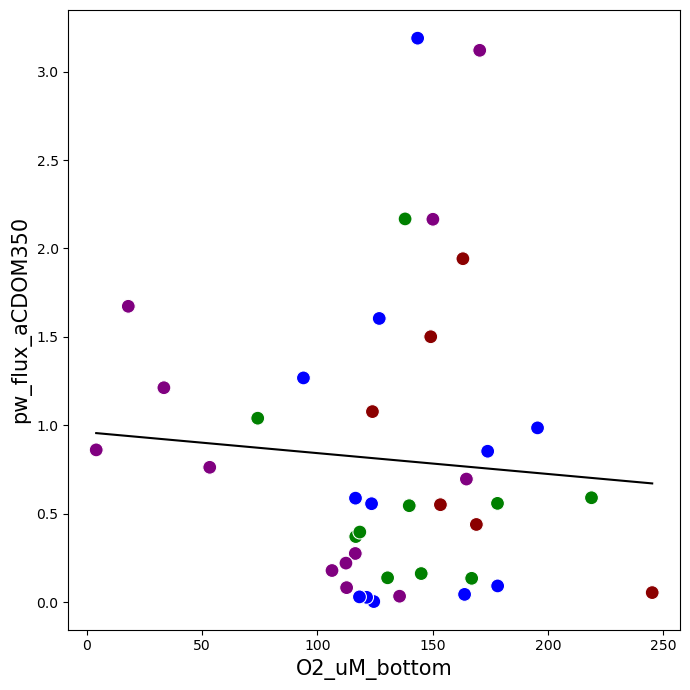

In [17]:
# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

x_var = 'O2_uM_bottom'
y_var = 'pw_flux_aCDOM350'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('pw_flux_doc', r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$'), size=15)
axes.set_ylabel(y_var.replace('dic_flux', r'F$_{DIC}$ (mmol $m^{-2}$ $day^{-1})$'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

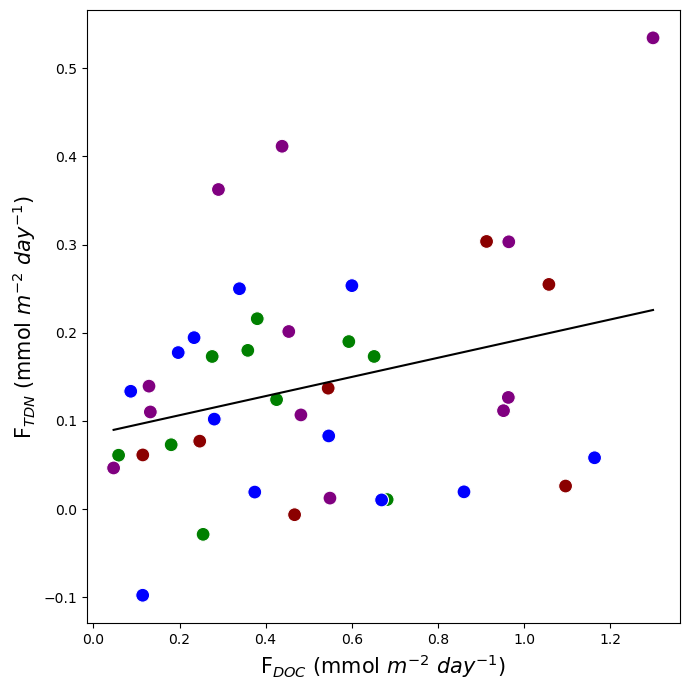

In [18]:
# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

x_var = 'pw_flux_doc'
y_var = 'pw_flux_tn'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('pw_flux_doc', r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$'), size=15)
axes.set_ylabel(y_var.replace('pw_flux_tn', r'F$_{TDN}$ (mmol $m^{-2}$ $day^{-1})$'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

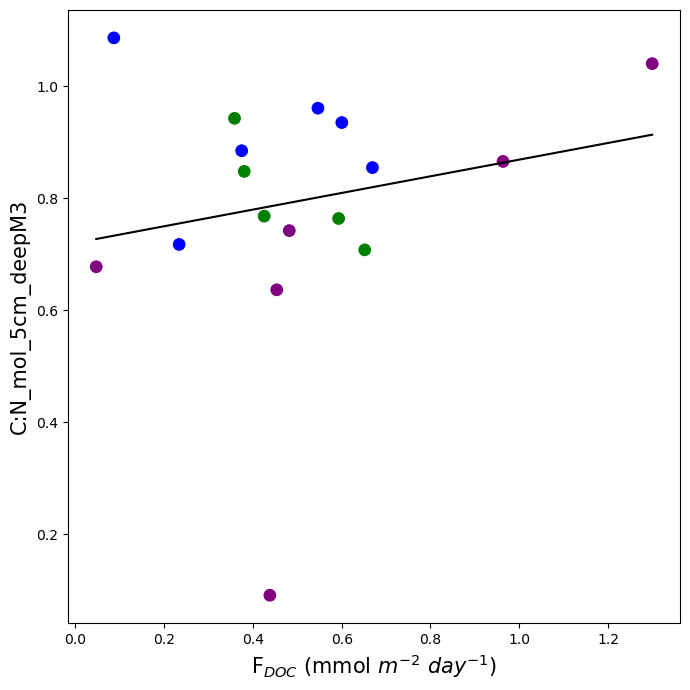

In [19]:
# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

x_var = 'pw_flux_doc'
y_var = 'C:N_mol_5cm_deepM3'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('pw_flux_doc', r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$'), size=15)
axes.set_ylabel(y_var.replace('C:N_mol_5cm_deepM3', 'C:N_mol_5cm_deepM3'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

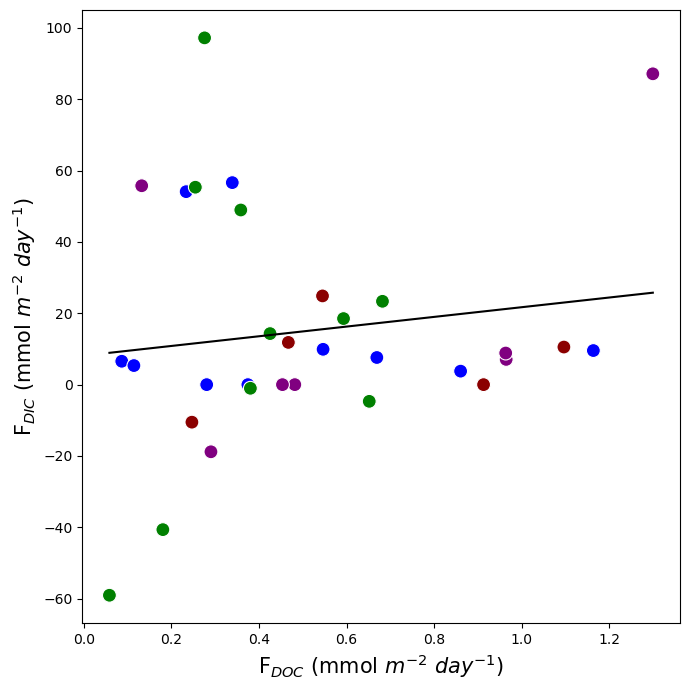

In [20]:
# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

x_var = 'pw_flux_doc'
y_var = 'dic_flux'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('pw_flux_doc', r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$'), size=15)
axes.set_ylabel(y_var.replace('dic_flux', r'F$_{DIC}$ (mmol $m^{-2}$ $day^{-1})$'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
df.columns
#some notes 

Index(['camp', 'station', 'date', 'Max_pressure', 'Pressure_dbar_surface',
       'O2_mgL_surface', 'latitude_surface', 'longitude_surface',
       'Pressure_dbar_bottom', 'O2_mgL_bottom',
       ...
       'Date', 'day_of_year', 'Fe2_m3', 'Fe3_m3', 'Fe2_m3_top', 'Fe3_m3_top',
       'distance_to_delta_km', 'distance_to_delta_lat_km',
       'distance_to_delta_lon_km', 'Mix_depth_sal'],
      dtype='object', length=124)

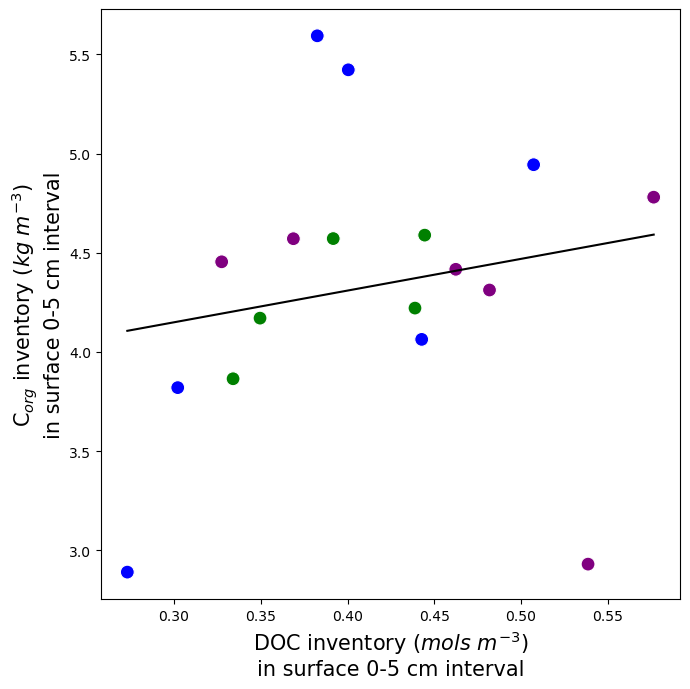

In [22]:
# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

x_var = 'doc_mol_per_m3_0_to_5cm'
y_var = 'OCkg_5cm_deep_M3'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_ylabel(y_var.replace('OCkg_5cm_deep_M3', r'C$_{org}$ inventory $(kg$ $m^{-3})$'+'\n'+ 'in surface 0-5 cm interval'), size=15)
axes.set_xlabel(x_var.replace('doc_mol_per_m3_0_to_5cm', r'DOC inventory $(mols$ $m^{-3})$'+'\n'+ 'in surface 0-5 cm interval'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

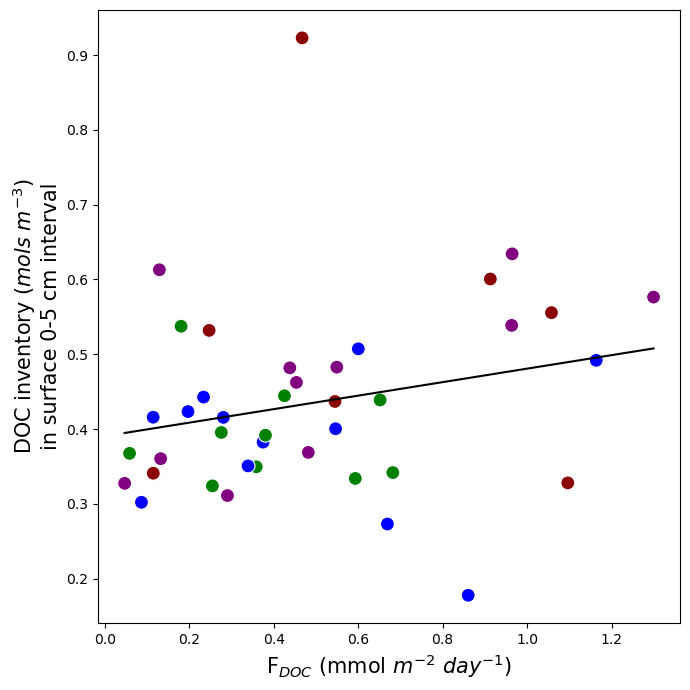

In [23]:
# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

x_var = 'pw_flux_doc'
y_var = 'doc_mol_per_m3_0_to_5cm'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('pw_flux_doc', r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$'), size=15)
axes.set_ylabel(y_var.replace('doc_mol_per_m3_0_to_5cm', r'DOC inventory $(mols$ $m^{-3})$'+'\n'+ 'in surface 0-5 cm interval'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

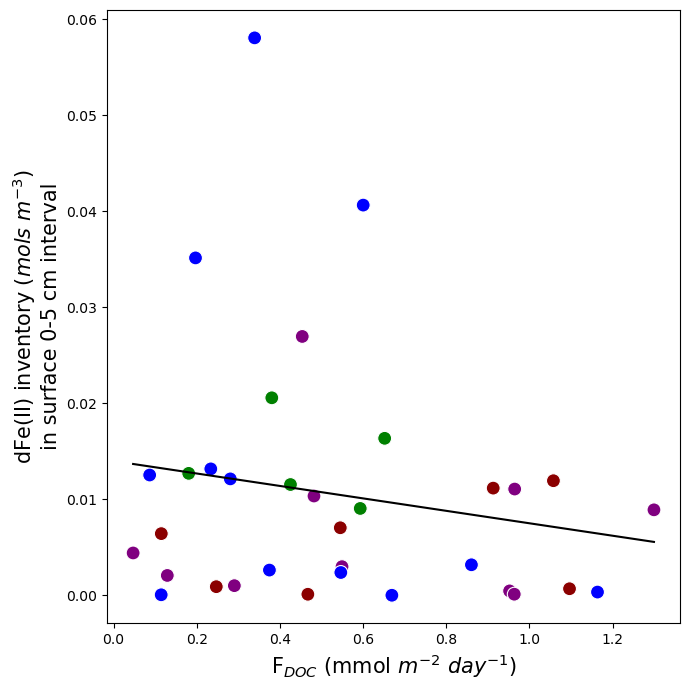

In [24]:
# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

x_var = 'pw_flux_doc'
y_var = 'fe2_mol_per_m3_0_to_5cm'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('pw_flux_doc', r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$'), size=15)
axes.set_ylabel(y_var.replace('fe2_mol_per_m3_0_to_5cm', r'dFe(II) inventory $(mols$ $m^{-3})$'+'\n'+ 'in surface 0-5 cm interval'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

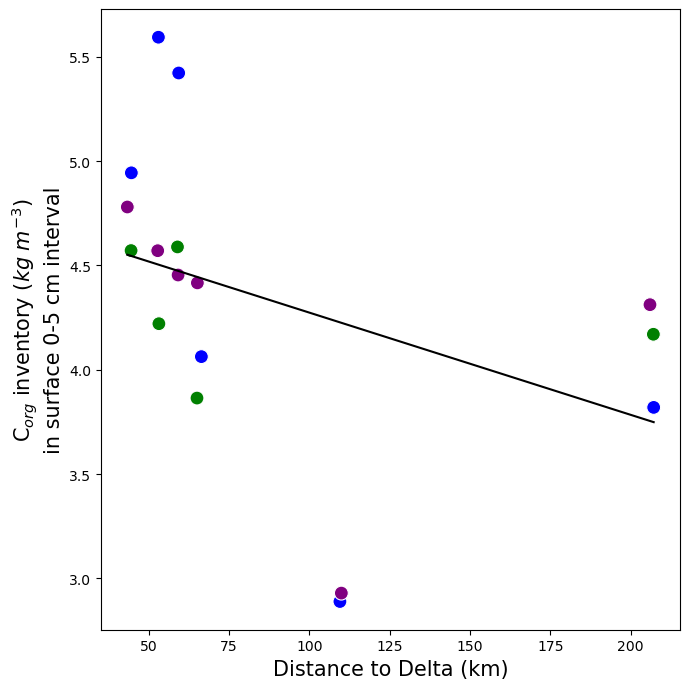

In [25]:
# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

x_var = 'distance_to_delta_km'
y_var = 'OCkg_5cm_deep_M3'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_ylabel(y_var.replace('OCkg_5cm_deep_M3', r'C$_{org}$ inventory $(kg$ $m^{-3})$'+'\n'+ 'in surface 0-5 cm interval'), size=15)
axes.set_xlabel(x_var.replace('distance_to_delta_km', r'Distance to Delta (km)'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

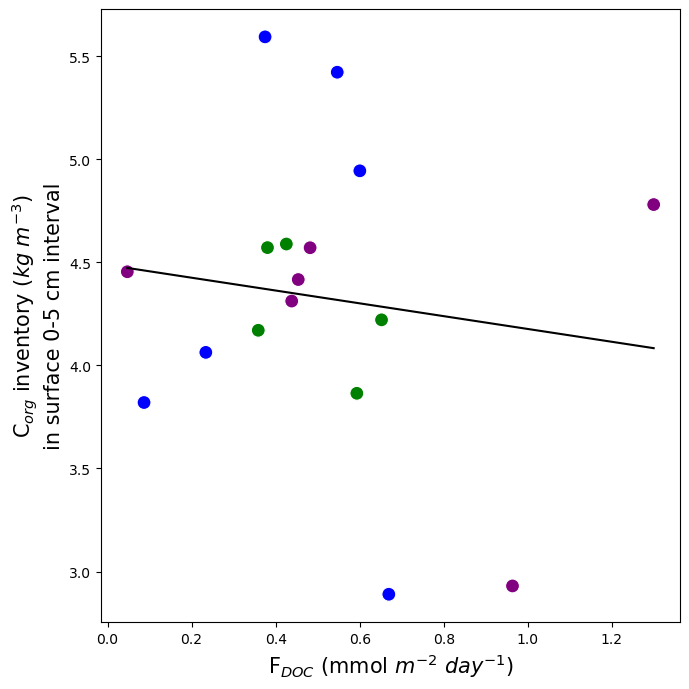

In [26]:
# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

x_var = 'pw_flux_doc'
y_var = 'OCkg_5cm_deep_M3'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('pw_flux_doc', r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$'), size=15)
axes.set_ylabel(y_var.replace('OCkg_5cm_deep_M3', r'C$_{org}$ inventory $(kg$ $m^{-3})$'+'\n'+ 'in surface 0-5 cm interval'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

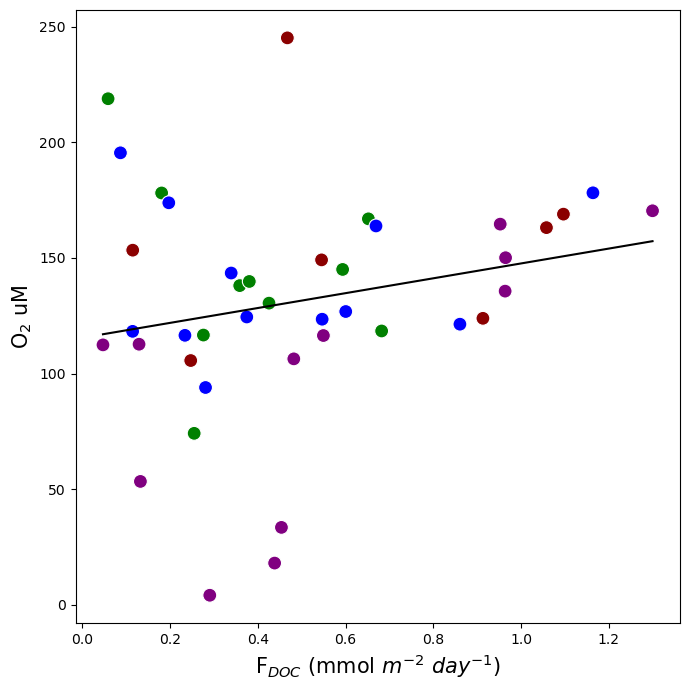

In [27]:
# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

x_var = 'pw_flux_doc'
y_var = 'O2_uM_bottom'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('pw_flux_doc', r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$'), size=15)
axes.set_ylabel(y_var.replace('O2_uM_bottom', r'O$_{2}$ uM'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

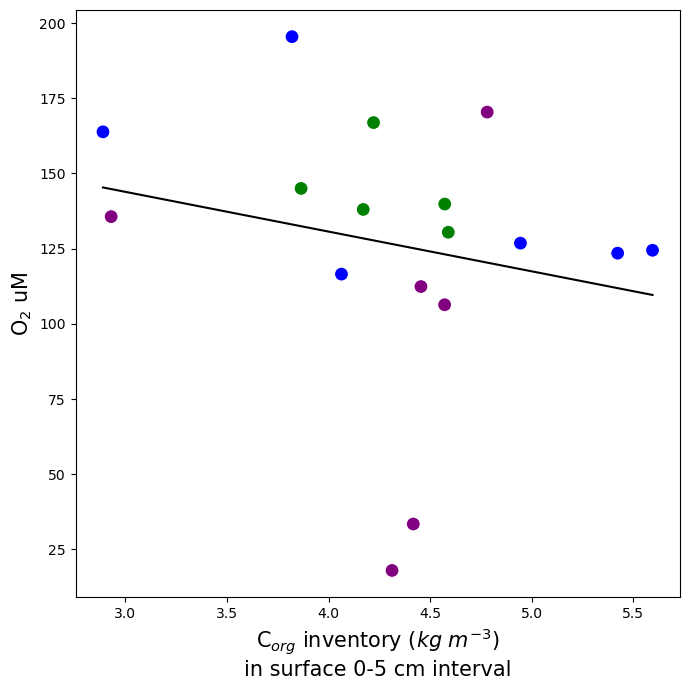

In [28]:
# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

x_var = 'OCkg_5cm_deep_M3'
y_var = 'O2_uM_bottom'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('OCkg_5cm_deep_M3',  r'C$_{org}$ inventory $(kg$ $m^{-3})$'+'\n'+ 'in surface 0-5 cm interval'), size=15)
axes.set_ylabel(y_var.replace('O2_uM_bottom', r'O$_{2}$ uM'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

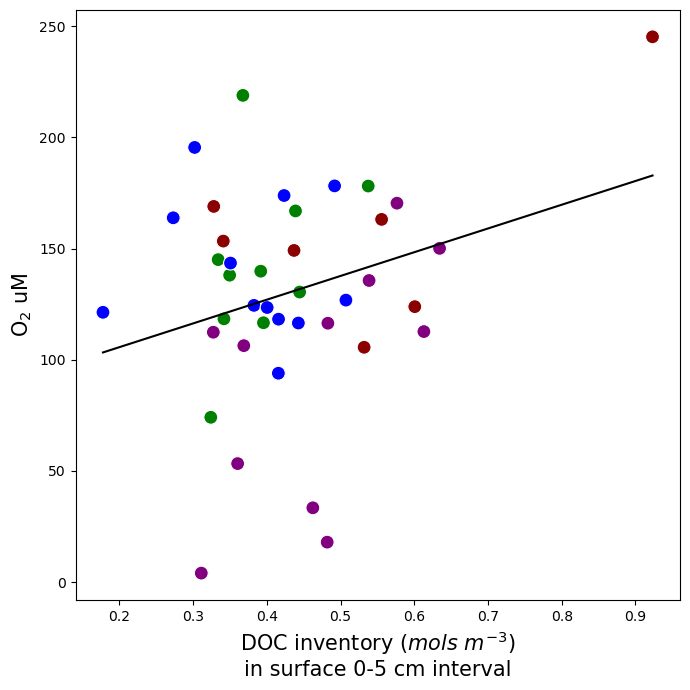

In [29]:
# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

x_var = 'doc_mol_per_m3_0_to_5cm'
y_var = 'O2_uM_bottom'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('doc_mol_per_m3_0_to_5cm', r'DOC inventory $(mols$ $m^{-3})$'+'\n'+ 'in surface 0-5 cm interval'), size=15)
axes.set_ylabel(y_var.replace('O2_uM_bottom', r'O$_{2}$ uM'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

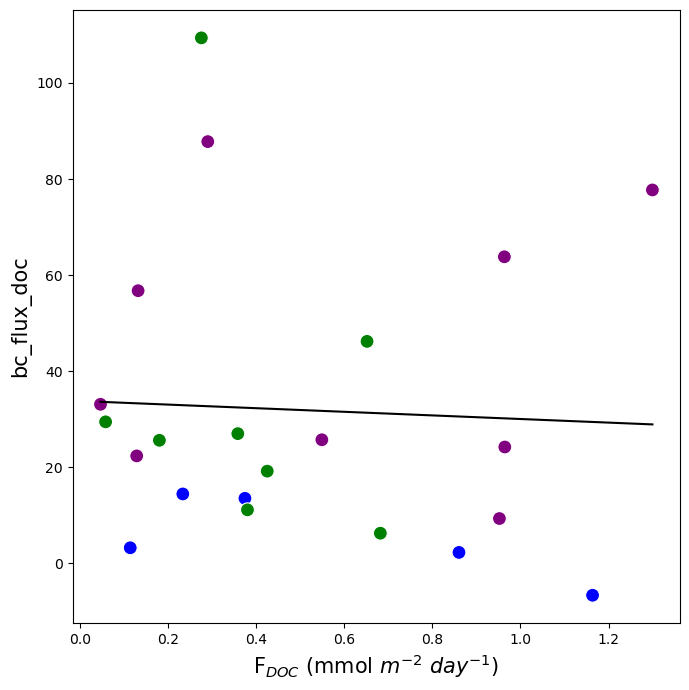

In [30]:
# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

x_var = 'pw_flux_doc'
y_var = 'bc_flux_doc'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('pw_flux_doc', r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$'), size=15)
axes.set_ylabel(y_var.replace('discharge_mi_ftps', 'Mississippi Discharge ($\mathrm{ft^3/s}$)'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

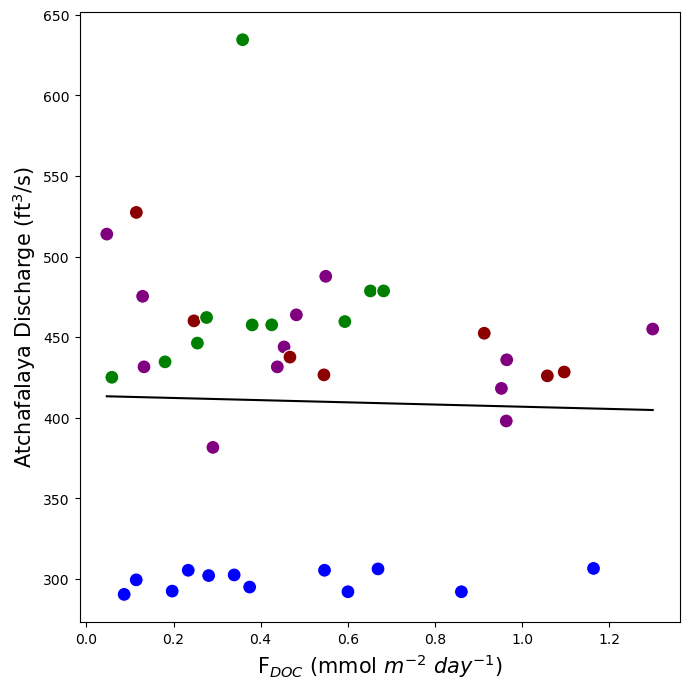

In [31]:
# Define custom colors
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

x_var = 'pw_flux_doc'
y_var = 'discharge_af_ftps'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

model = LinearRegression()
sub = df.dropna(subset=[x_var, y_var])
data = sub[[x_var, y_var, 'Camp']]
#data = data[data['pw_flux_doc'] < 15]
#data = data[data['pw_flux_tn'] >= 0]
subcat = data['Camp'].tolist()

X = data[[x_var]]
y = data[y_var]
model.fit(X, y)
score = model.score(X, y)

sns.scatterplot(x=x_var, y=y_var, color=[color_map[c] for c in subcat], s = 100, data=data, ax=axes, legend=False)
sns.lineplot(x=X[x_var], y=model.predict(X), ax=axes, color='black')

axes.set_xlabel(x_var.replace('pw_flux_doc', r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$'), size=15)
axes.set_ylabel(y_var.replace('discharge_af_ftps', 'Atchafalaya Discharge ($\mathrm{ft^3/s}$)'), size=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Define custom colors and labels
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

group_label_map_seas = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

color_map_rgn = {
    'hypox': '#FCEAEA',
    'riv': '#EAEEFC',
    'slope': '#ECFCEA',
    'shelf': '#F1EAFC'
}

group_label_map = {
    'riv': 'River Stations',
    'hypox': 'Hypoxic Shelf',
    'shelf': 'Non-Hypoxic Shelf',
    'slope': 'Slope'
}

variable_label_map = {
    'pw_flux_doc': r'F$_{DOC}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe3': r'F$_{dFe(III)}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe2': r'F$_{dFe(II)}$'+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_tn': r'F$_{TDN}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
}

variable_title_map = {
    'pw_flux_doc': 'Diffusive Flux'+'\n'+ r'F$_{DOC}$',
    'pw_flux_fe3': 'Diffusive Flux'+'\n'+r'F$_{dFe(III)}$',
    'pw_flux_fe2': 'Diffusive Flux'+'\n'+ r'F$_{dFe(II)}$',
    'pw_flux_tn': 'Diffusive Flux'+'\n'+ r'F$_{TDN}$'
}

variable_limits = {
    'pw_flux_doc': (-1, 30), 
    'pw_flux_fe3': (-1, 10),
    'pw_flux_fe2': (-1, 10),
    'pw_flux_tn': (-1, 4)  # corrected the extra comma
}

# Specify the variables to plot
variables_to_plot = ["pw_flux_fe3", "pw_flux_fe2","pw_flux_doc", "pw_flux_tn"]
errors_to_plot = ["pw_flux_fe3_error", "pw_flux_fe2_error","pw_flux_doc_error", "pw_flux_tn_error"]


# Create a boxplot for each variable in a subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns

# Loop through variables and create boxplots
for i, var in enumerate(variables_to_plot):
    sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=group_label_map.keys(), ax=axes.flatten()[i], 
               flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
    sns.stripplot(data=df, x='rgn', y=var, hue='Camp', jitter=0.25, order=group_label_map.keys(), ax=axes.flatten()[i],
                  size = 7.5, linewidth = 1.0, edgecolor = 'black', palette=color_map)
    axes.flatten()[i].set_title(variable_title_map[var])  # Set title
    axes.flatten()[i].set_xlabel("")  # Remove x-axis label
    axes.flatten()[i].set_ylabel(variable_label_map[var])  # Remove y-axis label
    
    # Set custom labels for x-axis ticks
    axes.flatten()[i].set_xticklabels([group_label_map[x.get_text()] for x in axes.flatten()[i].get_xticklabels()])
    
    x_values = df['rgn']  # Assuming 'rgn' is the x-axis variable
    y_values = df[var]  # Assuming 'var' is the y-axis variable
    y_errors = df[errors_to_plot[i]]  # Assuming 'error_column' contains the errors
    axes.flatten()[i].errorbar(x_values, y_values, yerr=y_errors, fmt='none', color='black', capsize=4)

# Define legend handles
legend_handles = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in color_map.items()]

# Set y-axis labels and limits
for i, var in enumerate(variables_to_plot):
    ax = axes.flatten()[i]
    ax.set_ylabel(variable_label_map[var])
    ax.set_ylim(variable_limits[var])  # Set y-axis limits
    ax.legend(title='Campaign', handles=legend_handles, labels=group_label_map_seas.values(), loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# Define custom colors and labels
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}

group_label_map_seas = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

color_map_rgn = {
    'hypox': '#FCEAEA',
    'riv': '#EAEEFC',
    'slope': '#ECFCEA',
    'shelf': '#F1EAFC'
}

group_label_map = {
    'riv': 'River Stations',
    'hypox': 'Hypoxic Shelf',
    'shelf': 'Non-Hypoxic Shelf',
    'slope': 'Slope'
}

variable_label_map = {
    'pw_flux_doc': r'F$_{DOC}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe3': r'F$_{dFe(III)}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_fe2': r'F$_{dFe(II)}$'+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
    'pw_flux_tn': r'F$_{TDN}$ '+'\n'+ r'(mmol $m^{-2}$ $day^{-1})$',
}

variable_title_map = {
    'pw_flux_doc': 'Diffusive Flux'+'\n'+ r'F$_{DOC}$',
    'pw_flux_fe3': 'Diffusive Flux'+'\n'+r'F$_{dFe(III)}$',
    'pw_flux_fe2': 'Diffusive Flux'+'\n'+ r'F$_{dFe(II)}$',
    'pw_flux_tn': 'Diffusive Flux'+'\n'+ r'F$_{TDN}$'
}

variable_limits = {
    'pw_flux_doc': (-1, 30), 
    'pw_flux_fe3': (-1, 10),
    'pw_flux_fe2': (-1, 10),
    'pw_flux_tn': (-1, 4)  # corrected the extra comma
}

# Specify the variables to plot
variables_to_plot = ["pw_flux_fe3", "pw_flux_fe2","pw_flux_doc", "pw_flux_tn"]
errors_to_plot = ["pw_flux_fe3_error", "pw_flux_fe2_error","pw_flux_doc_error", "pw_flux_tn_error"]

# Create a boxplot for each variable in a subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns

# Loop through variables and create boxplots
for i, var in enumerate(variables_to_plot):
    sns.boxplot(data=df, x='rgn', y=var, palette=color_map_rgn, order=group_label_map.keys(), ax=axes.flatten()[i], 
               flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
    sns.stripplot(data=df, x='rgn', y=var, hue='Camp', jitter=0.25, order=group_label_map.keys(), ax=axes.flatten()[i],
                  size = 7.5, linewidth = 1.0, edgecolor = 'black', palette=color_map)
    axes.flatten()[i].set_title(variable_title_map[var])  # Set title
    axes.flatten()[i].set_xlabel("")  # Remove x-axis label
    axes.flatten()[i].set_ylabel(variable_label_map[var])  # Remove y-axis label
    
    # Set custom labels for x-axis ticks
    axes.flatten()[i].set_xticklabels([group_label_map[x.get_text()] for x in axes.flatten()[i].get_xticklabels()])
    
    x_values = df['rgn']  # Assuming 'rgn' is the x-axis variable
    y_values = df[var]  # Assuming 'var' is the y-axis variable
    y_errors = df[errors_to_plot[i]]  # Assuming 'error_column' contains the errors
    axes.flatten()[i].errorbar(x_values, y_values, yerr=y_errors, fmt='none', color='black', capsize=4)

# Define legend handles
legend_handles = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in color_map.items()]

# Set y-axis labels and limits
for i, var in enumerate(variables_to_plot):
    ax = axes.flatten()[i]
    ax.set_ylabel(variable_label_map[var])
    ax.set_ylim(variable_limits[var])  # Set y-axis limits
    ax.legend(title='Campaign', handles=legend_handles, labels=group_label_map_seas.values(), loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [32]:
df.columns

Index(['camp', 'station', 'date', 'Max_pressure', 'Pressure_dbar_surface',
       'O2_mgL_surface', 'latitude_surface', 'longitude_surface',
       'Pressure_dbar_bottom', 'O2_mgL_bottom',
       ...
       'Date', 'day_of_year', 'Fe2_m3', 'Fe3_m3', 'Fe2_m3_top', 'Fe3_m3_top',
       'distance_to_delta_km', 'distance_to_delta_lat_km',
       'distance_to_delta_lon_km', 'Mix_depth_sal'],
      dtype='object', length=124)

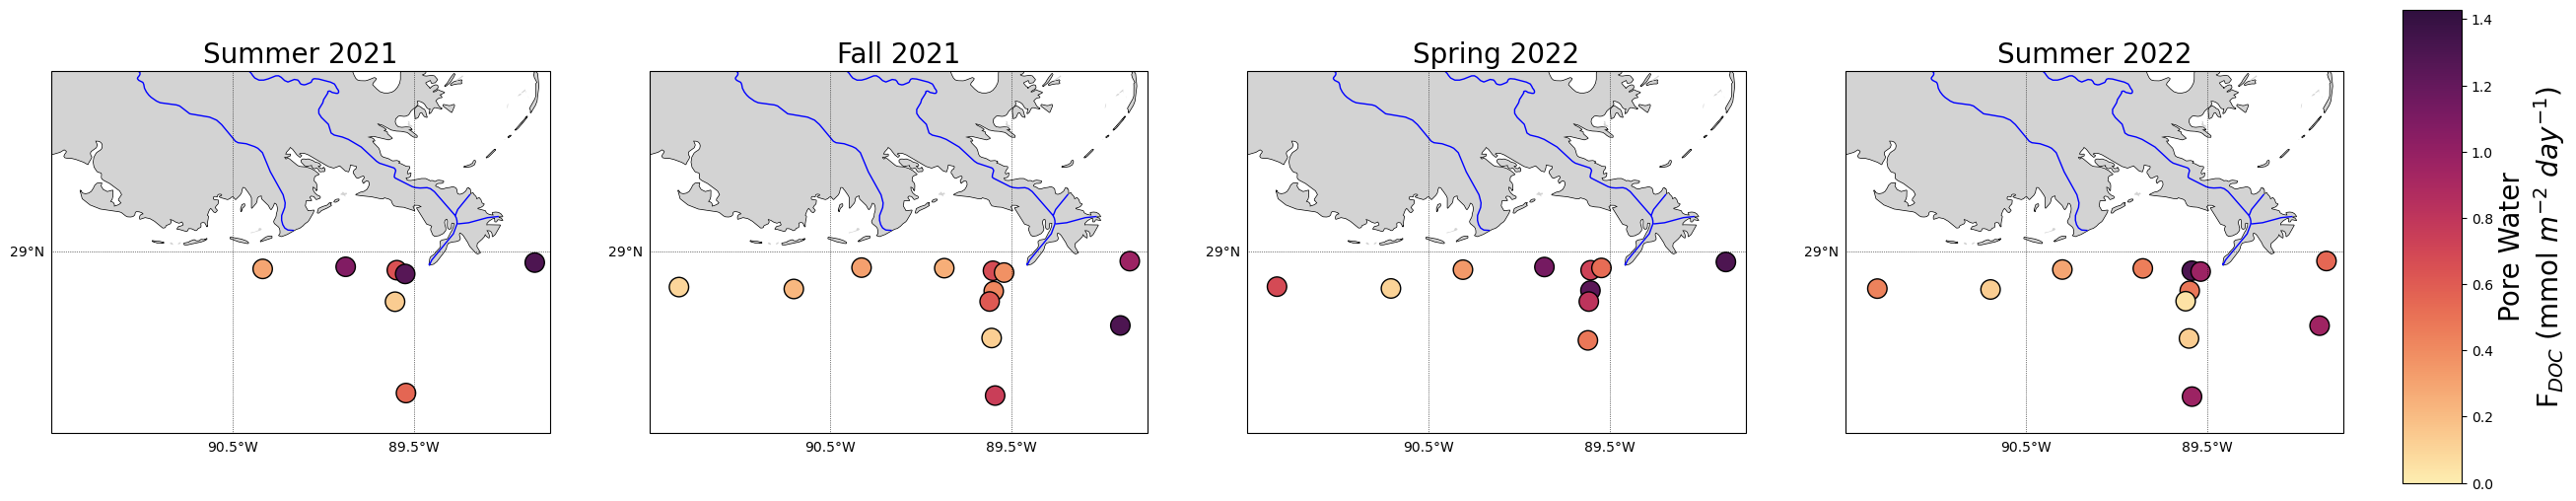

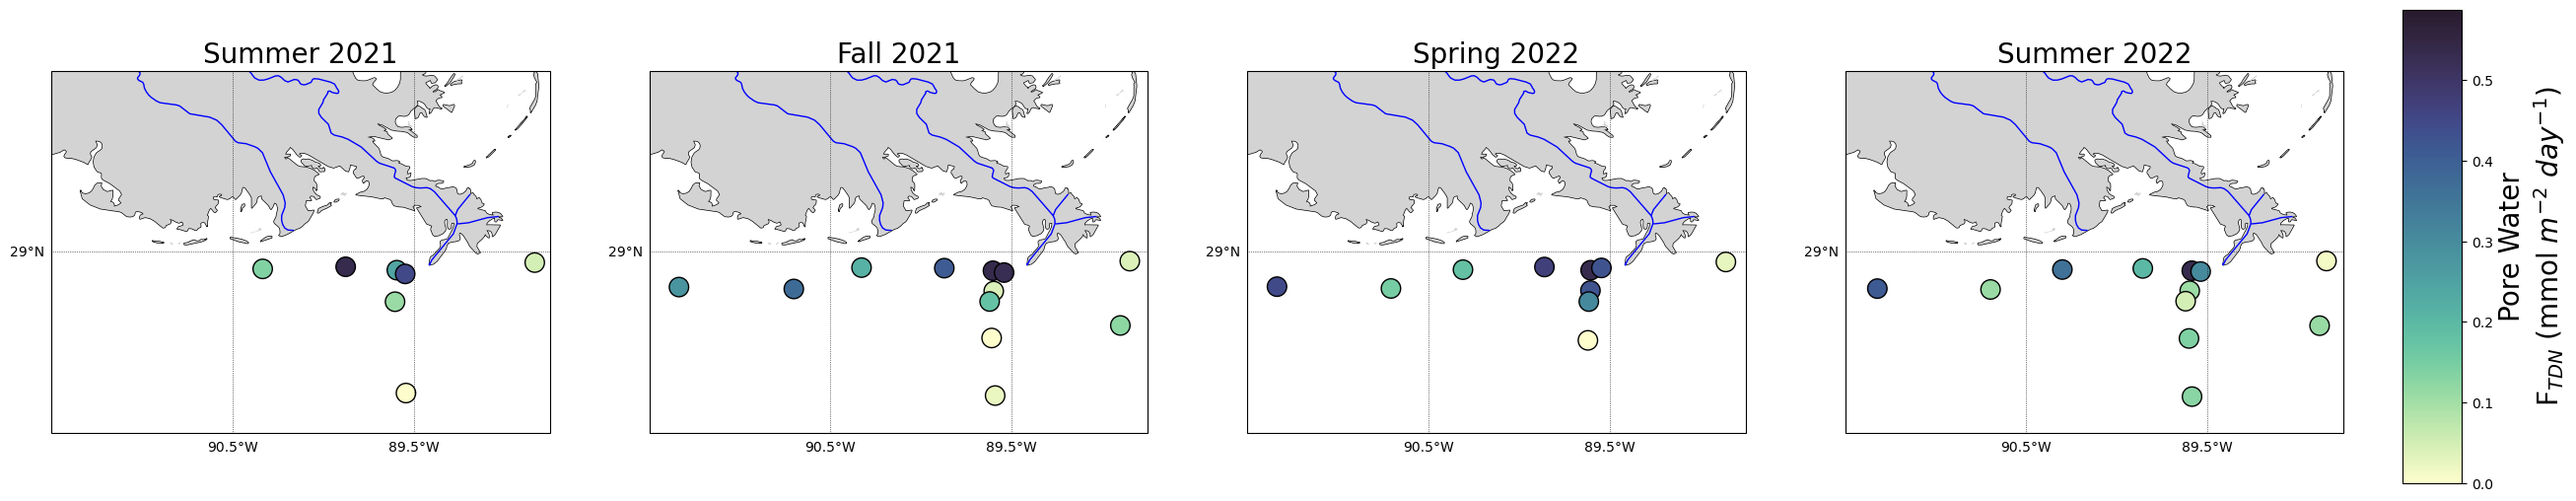

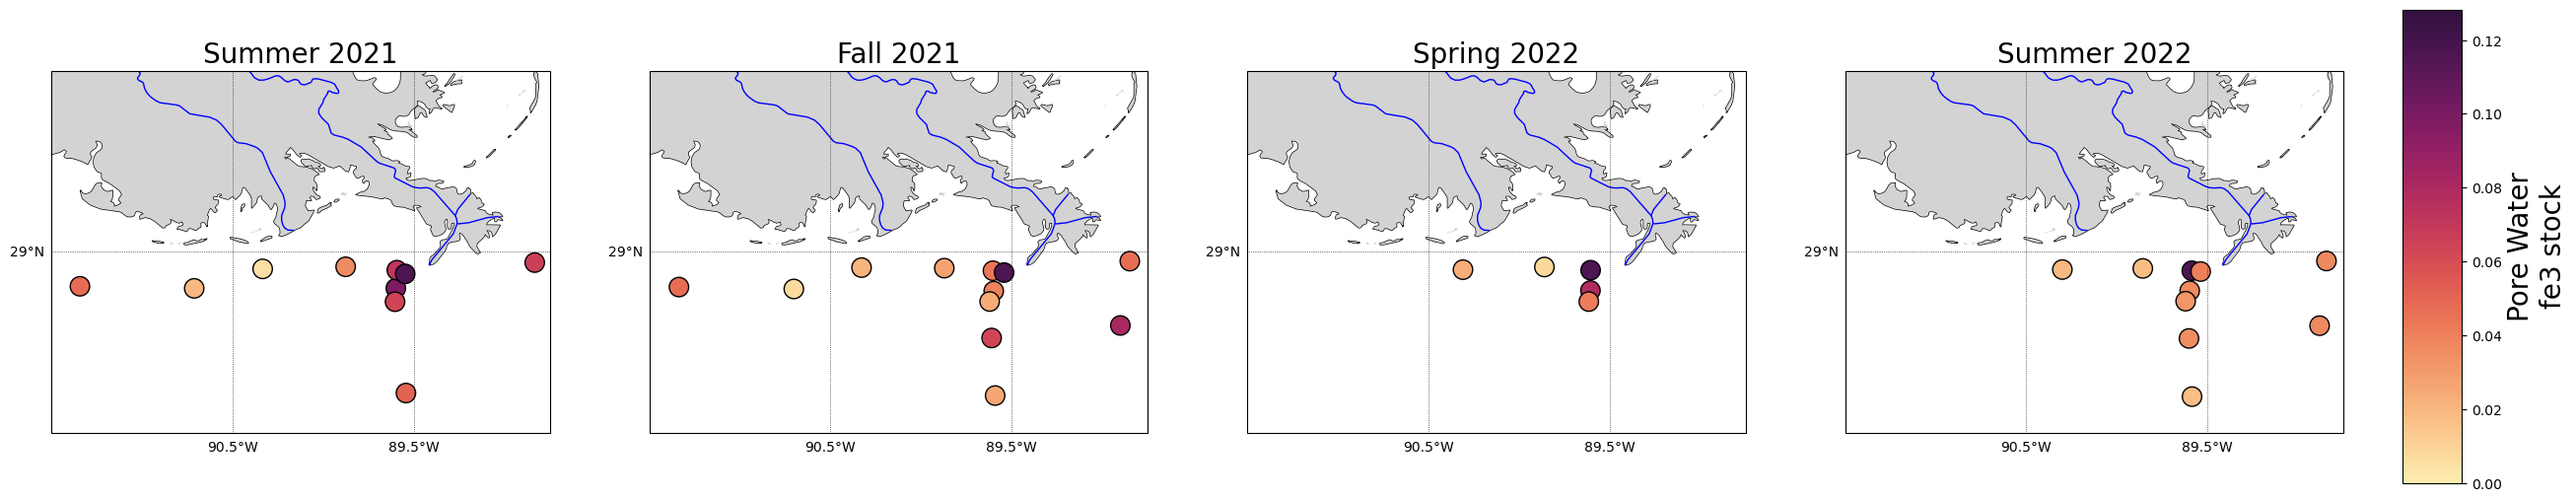

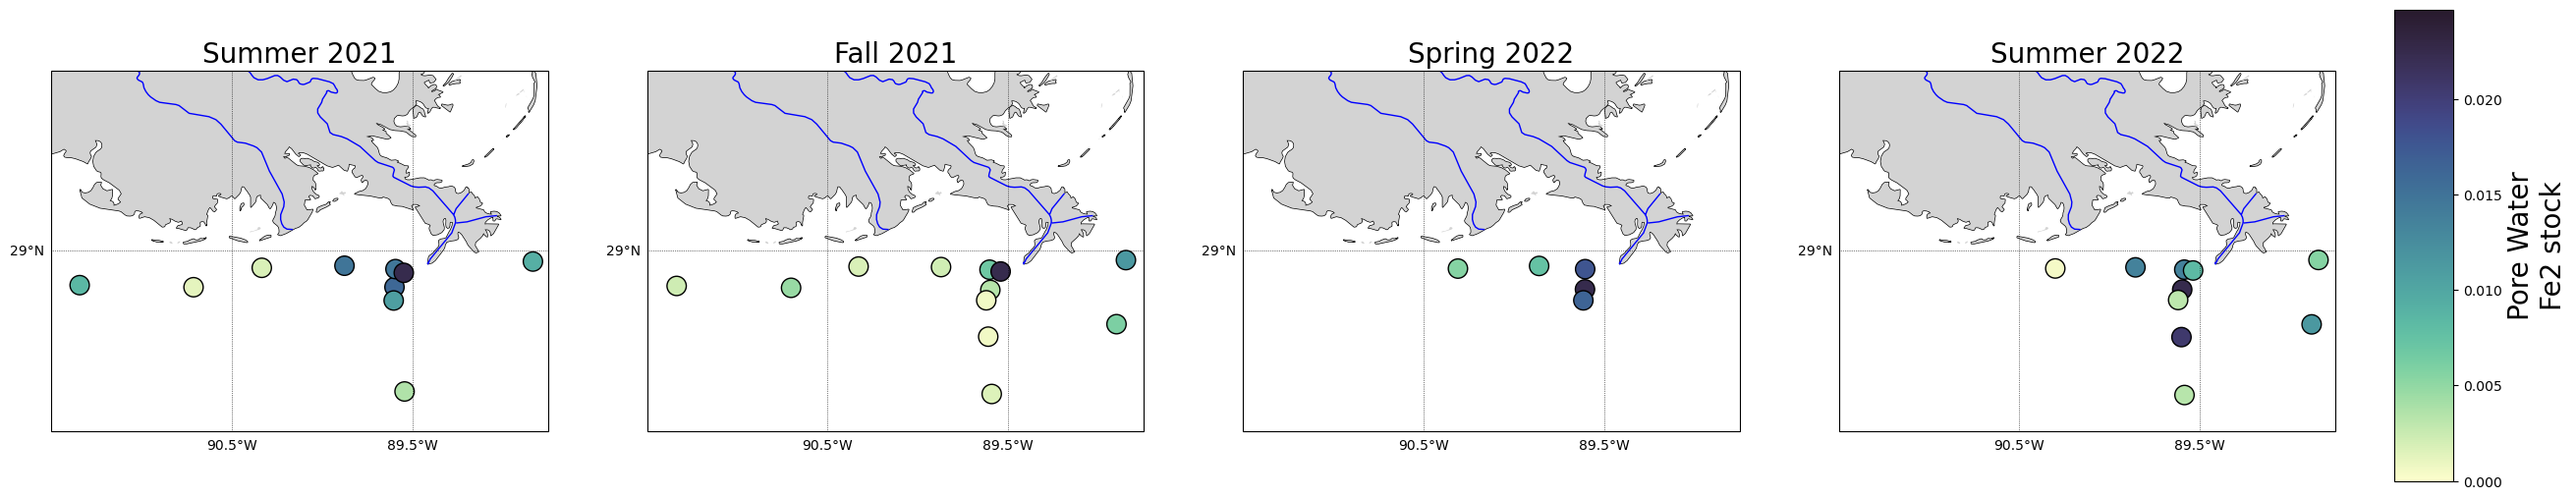

In [33]:
lat_top=30
lat_bot=28
lon_left=-91.5
lon_rigth=-88.75
extent=[lon_left, lon_rigth, lat_bot, lat_top]
res = '10m'

def plot_mapbase(extent, ax=None, res='10m', projection=ccrs.PlateCarree()):
    if ax is None:
        fig = plt.figure(figsize=(10,5)) # set fig size
        ax = fig.add_subplot(111, projection=projection)
        
    ax.set_extent(extent)
    ax.coastlines(res)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='lightgrey', 
                                                scale=res)) 
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='rivers_lake_centerlines',
                                                edgecolor='blue',
                                                facecolor='none',
                                                scale=res))
    gl = ax.gridlines(xlocs=np.arange(lon_left, lon_rigth+1),
                      ylocs=np.arange(lat_bot, lat_top+1),
                      draw_labels=True, 
                      linewidth=0.5, color='k', linestyle=':')
    gl.top_labels = gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return ax

def map_fluxes(data_f, topic,cb_name, grad):
    camps = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30, 12), subplot_kw={'projection': ccrs.PlateCarree()})
    axes = axes.ravel()  # Flatten the 2x2 grid to access each subplot with a single index
    for i, camp in enumerate(camps):
        df_subset = data_f[data_f['Camp'] == camp].dropna(subset=[topic])    
        plot_mapbase(extent, ax=axes[i])
        mappable = axes[i].scatter(df_subset['longitude_bottom'], df_subset['latitude_bottom'],
                                   c=df_subset[topic],
                                   edgecolor='k',
                                   cmap=grad,
                                   s=200,
                                   vmin=0,  # Set global min and max for colormap
                                   vmax=df_subset[topic].max()*1.1,
                                   transform=ccrs.PlateCarree())
    
        label_map = {
            'GOM2021': 'Summer 2021',
            'GOM21FA': 'Fall 2021',
            'GOM22SP': 'Spring 2022',
            'GOM22SU': 'Summer 2022'
        }
    
        axes[i].set_title(label_map[camp], size = 20)
    
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
    cb = fig.colorbar(mappable, cax=cbar_ax)
    cb.set_label(cb_name, size=20, color='black')
    cb.ax.tick_params(labelcolor='black') 
    cb.ax.tick_params(labelsize=10)
    fig.set_facecolor('w')
    plt.show()
    
#set params 
data_f = df
topic = "pw_flux_doc"
cb_name = r'Pore Water'+'\n'+r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$'
grad = cmo.matter
map_fluxes(data_f, topic,cb_name, grad)

#set params 
data_f = df
topic = "pw_flux_tn"
cb_name = r'Pore Water'+'\n'+r'F$_{TDN}$ (mmol $m^{-2}$ $day^{-1})$'
grad = cmo.deep
map_fluxes(data_f, topic,cb_name, grad)


#set params 
data_f = df
topic = "Fe3_m3"
cb_name = r'Pore Water'+'\n'+r'fe3 stock'
grad = cmo.matter
map_fluxes(data_f, topic,cb_name, grad)

#set params 
data_f = df
topic = "Fe2_m3"
cb_name = r'Pore Water'+'\n'+r'Fe2 stock'
grad = cmo.deep
map_fluxes(data_f, topic,cb_name, grad)


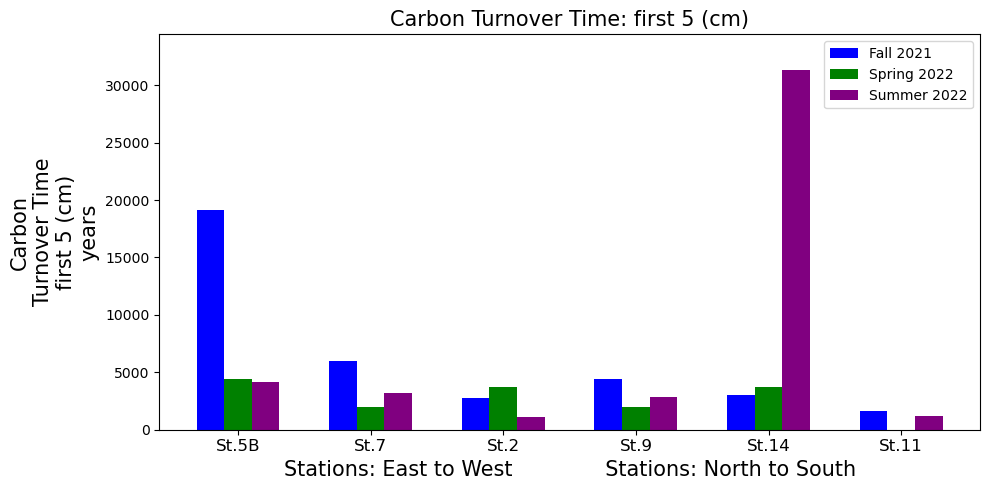

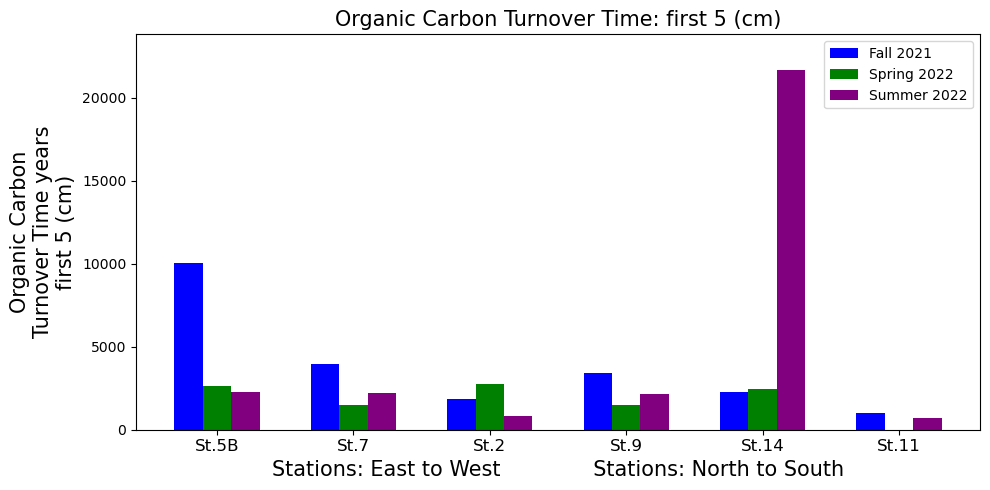

In [34]:
# Assuming df is your DataFrame
# Fix the calculation of tt_y_C and tt_y_OC
df['tt_y_C'] = (df['Cg_5cm_deep/M2'] / 12.011) / (df['pw_flux_doc'] * 365 / 1000)
df['tt_y_OC'] = (df['OCg_5cm_deep/M2'] / 12.011) / (df['pw_flux_doc'] * 365 / 1000)

categories = ['St.5B', 'St.7', 'St.2', 'St.9', 'St.14', 'St.11']
subcategories = ['GOM21FA', 'GOM22SP', 'GOM22SU']

def bar_plot_stock(data_f, flux_col, ylabels, title): 
    df = data_f.dropna(subset=[flux_col])

    color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }

    barWidth = 0.25
    fig, ax = plt.subplots(figsize=(10, 5))

    # Adjusted r for spacing between groups
    r = np.arange(0, len(categories) * 1.2, 1.2)
    positions = [r + i * barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        for cat in categories:
            value = df[(df['Stn'] == cat) & (df['Camp'] == subcat)][flux_col].values
            if len(value) > 0:
                values.append(value[0])
            else:
                values.append(np.nan)  # Append NaN for missing values
            # Calculate errors, if needed
            # errors.append(YourErrorCalculationHere)

        ax.bar(pos, [v if v > 0 else 0 for v in values], width=barWidth, color=color_map[subcat],
               label=label_map[subcat])

    ax.set_ylim(0, df[flux_col].max() * 1.1)
    ax.set_xlabel('Stations: East to West              Stations: North to South', size=15)
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r + 1*barWidth)
    ax.set_xticklabels(categories, size = 12)

    handles, _ = plt.gca().get_legend_handles_labels()
    labels = [label_map[subcat] for subcat in subcategories]
    ax.legend(handles[:len(subcategories)], labels)

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.savefig(f'../Dissertation_projects/Figures/Flux_figures/{save_name}.png')


    plt.show()

    

ylabes = r'Carbon'+'\n'+'Turnover Time'+'\n'+ 'first 5 (cm)'+'\n'+r'years'
tlabes = 'Carbon Turnover Time: first 5 (cm)'
data_f = df
flux_col = "tt_y_C"
save_name = 'C_tt_5cm_year'

bar_plot_stock(data_f, flux_col, ylabes, tlabes) 

ylabes = r'Organic Carbon'+'\n'+'Turnover Time years'+'\n'+ 'first 5 (cm)'
tlabes = 'Organic Carbon Turnover Time: first 5 (cm)'
data_f = df
flux_col = "tt_y_OC"
save_name = 'OC_tt_5cm_year'


bar_plot_stock(data_f, flux_col, ylabes, tlabes)  


In [35]:
categories = df['station'].unique()
categories

df['doc_mol_per_m3_0_to_5cm']

code
St.ML_GOM2021           NaN
St.MK-2_GOM21FA         NaN
St.MK_GOM22SU      0.311114
St.MK_GOM2021      0.531959
St.MK_GOM22SP      0.537495
St.MK_GOM21FA      0.415638
St.9_GOM22SP       0.438893
St.9_GOM2021            NaN
St.9_GOM21FA       0.382546
St.9_GOM22SU       0.368780
St.7_GOM22SP       0.334009
St.7_GOM2021       0.600673
St.7_GOM21FA       0.442762
St.7_GOM22SU       0.462417
St.6_GOM21FA            NaN
St.5B_GOM22SP      0.349554
St.5B_GOM21FA      0.302104
St.5B_GOM22SU      0.481853
St.5B_GOM2021           NaN
St.4_GOM2021            NaN
St.4_GOM22SP       0.367531
St.4_GOM22SU       0.360399
St.4_GOM21FA       0.423393
St.2_GOM2021       0.436882
St.2_GOM22SP       0.391753
St.2_GOM22SU       0.576511
St.2_GOM21FA       0.507289
St.16-2_GOM21FA         NaN
St.16_GOM2021      0.555662
St.16_GOM22SU      0.634287
St.16_GOM21FA      0.350724
St.16_GOM22SP      0.395437
St.15_GOM21FA      0.177777
St.15_GOM22SP      0.341838
St.15_GOM2021      0.328016
St.15_GOM22SU  

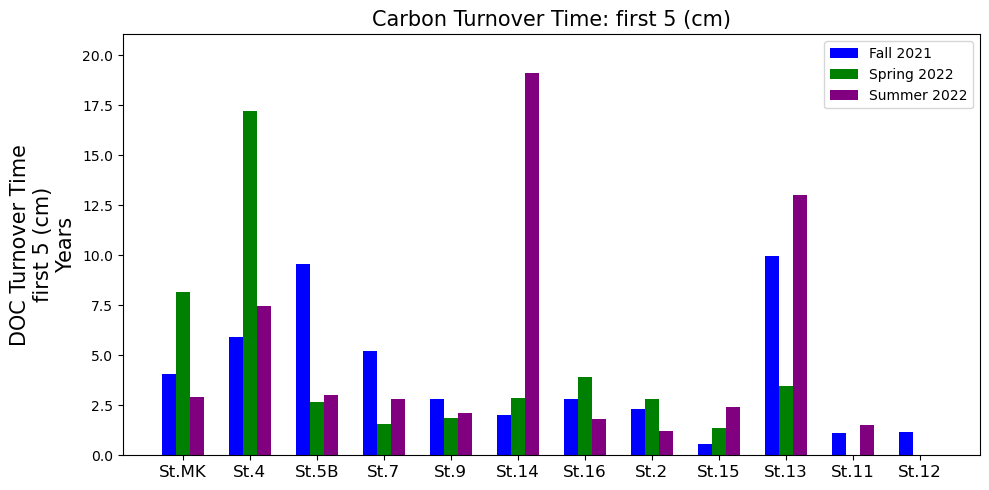

In [36]:
# Assuming df is your DataFrame
# Fix the calculation of tt_y_C and tt_y_OC
df['tt_y_doc'] = (df['doc_mol_per_m3_0_to_5cm']) / (df['pw_flux_doc'] * 365 / 1000)
df['tt_day_doc'] = (df['doc_mol_per_m3_0_to_5cm']) / (df['pw_flux_doc'] / 1000)

categories = ['St.MK', 'St.4', 'St.5B',
              'St.7', 'St.9', 'St.14',
              'St.16', 'St.2',
              'St.15', 'St.13', 'St.11', 'St.12']
subcategories = ['GOM21FA', 'GOM22SP', 'GOM22SU']

def bar_plot_stock(data_f, flux_col, ylabels, title): 
    df = data_f.dropna(subset=[flux_col])

    color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }

    barWidth = 0.25
    fig, ax = plt.subplots(figsize=(10, 5))

    # Adjusted r for spacing between groups
    r = np.arange(0, len(categories) * 1.2, 1.2)
    positions = [r + i * barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        for cat in categories:
            value = df[(df['Stn'] == cat) & (df['Camp'] == subcat)][flux_col].values
            if len(value) > 0:
                values.append(value[0])
            else:
                values.append(np.nan)  # Append NaN for missing values
            # Calculate errors, if needed
            # errors.append(YourErrorCalculationHere)

        ax.bar(pos, [v if v > 0 else 0 for v in values], width=barWidth, color=color_map[subcat],
               label=label_map[subcat])

    ax.set_ylim(0, df[flux_col].max() * 1.1)
    #ax.set_xlabel('Stations: East to West              Stations: North to South', size=15)
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r + 1*barWidth)
    ax.set_xticklabels(categories, size = 12)

    handles, _ = plt.gca().get_legend_handles_labels()
    labels = [label_map[subcat] for subcat in subcategories]
    ax.legend(handles[:len(subcategories)], labels)

    fig.set_facecolor('w')
    plt.tight_layout()
    
    plt.savefig(f'../Dissertation_projects/Figures/Flux_figures/{save_name}.png')


    plt.show()

ylabes = r'DOC Turnover Time'+'\n'+ 'first 5 (cm)'+'\n'+r'Years'
tlabes = 'Carbon Turnover Time: first 5 (cm)'
data_f = df
flux_col = "tt_y_doc"
save_name = 'doc_tt_5cm_year'


bar_plot_stock(data_f, flux_col, ylabes, tlabes) 


df_doc = pd.read_csv('../Dissertation_projects/Data/TOC/TOC_GOM.csv', sep=',', index_col=0)

#make all BDL a 0 
df_doc.loc[df_doc['NPOC_uM'] == 'BLD', 'NPOC_uM'] = 0
df_doc.loc[df_doc['TN_uM'] == 'BLD', 'TN_uM'] = 0

df_doc.loc[df_doc['NPOC_uM'] < 0, 'NPOC_uM'] = 0
df_doc.loc[df_doc['TN_uM'] < 0, 'TN_uM'] = 0

#fix date time 
df_doc['date_time'] = pd.to_datetime(df_doc['Date'])
df_doc['Date'] = df_doc['date_time'].dt.date

df_doc['NPOC_uM'] = pd.to_numeric(df_doc['NPOC_uM'], errors='coerce')
df_doc['NPOC_uM'] = df_doc['NPOC_uM'].where(pd.notna(df_doc['NPOC_uM']), other=np.nan)

df_doc['TN_uM'] = pd.to_numeric(df_doc['TN_uM'], errors='coerce')
df_doc['TN_uM'] = df_doc['TN_uM'].where(pd.notna(df_doc['TN_uM']), other=np.nan)

df_doc['Time'] = pd.to_numeric(df_doc['Time'], errors='coerce')
df_doc['Time'] = df_doc['Time'].where(pd.notna(df_doc['Time']), other=np.nan)

df_doc['code'] = df_doc['Location'] + '_' + df_doc['Campaign']

df_doc = df_doc.drop(222101, axis=0)
df_doc = df_doc.drop(212211, axis=0)


###################################################

#get WC data sets 
df_doc_wc = df_doc[df_doc['Type'] == 'WC']

codes = df_doc_wc['code'].unique()

df_doc_wc_plot = df_doc_wc[df_doc_wc['code'].isin(codes)]

max_depth_per_code = df_doc_wc_plot.groupby('code')['Depth'].max().reset_index()
df_doc_wc_plot = pd.merge(df_doc_wc_plot, max_depth_per_code, on='code', suffixes=('', '_max'))
df_doc_wc_plot = df_doc_wc_plot[df_doc_wc_plot['Depth'] == df_doc_wc_plot['Depth_max']]
df_doc_wc_plot.drop(columns=['Depth_max'], inplace=True)



#mean_doc = df_doc_wc_plot.groupby('code')['NPOC_uM'].mean().reset_index()
#mean_tn = df_doc_wc_plot.groupby('code')['TN_uM'].mean().reset_index()
#std_doc = df_doc_wc_plot.groupby('code')['NPOC_uM_std'].mesuan().reset_index()
#stc_tn = df_doc_wc_plot.groupby('code')['NPOC_uM_std'].mean().reset_index()

df_doc_wc_plot['Depth_sample'] = df_doc_wc_plot['Depth']
df_doc_wc_plot['Depth'] = -0.5

# Calculate the mean of "NPOC_uM", "TN_uM", and "Depth" for each group in 'code'
df_doc_wc_plot = df_doc_wc_plot.groupby('code').agg({'NPOC_uM': 'mean', 'TN_uM': 'mean', 'Depth': 'mean', 'NPOC_uM_std': 'sum', 'TN_uM_std': 'sum'}).reset_index()


# Display the result dataframe
df_doc_wc_plot.index = df_doc_wc_plot['code']
df_doc_wc_plot

df = df.join(df_doc_wc_plot)
df.columns

# Assuming df is your DataFrame
# Fix the calculation of tt_y_C and tt_y_OC
df['tt_min_doc'] = (df['NPOC_uM']*1000) / (df['pw_flux_doc'] / (24 * 60) * 1000)
df['tt_day_doc'] = (df['NPOC_uM']*1000) / (df['pw_flux_doc'] * 1000)

categories = ['St.MK', 'St.4', 'St.5B',
              'St.7', 'St.9', 'St.14',
              'St.16', 'St.2',
              'St.15', 'St.13', 'St.11', 'St.12']
subcategories = ['GOM21FA', 'GOM22SP', 'GOM22SU']

def bar_plot_stock(data_f, flux_col, ylabels, title): 
    df = data_f.dropna(subset=[flux_col])

    color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }

    barWidth = 0.25
    fig, ax = plt.subplots(figsize=(10, 5))

    # Adjusted r for spacing between groups
    r = np.arange(0, len(categories) * 1.2, 1.2)
    positions = [r + i * barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        for cat in categories:
            value = df[(df['Stn'] == cat) & (df['Camp'] == subcat)][flux_col].values
            if len(value) > 0:
                values.append(value[0])
            else:
                values.append(np.nan)  # Append NaN for missing values
            # Calculate errors, if needed
            # errors.append(YourErrorCalculationHere)

        ax.bar(pos, [v if v > 0 else 0 for v in values], width=barWidth, color=color_map[subcat],
               label=label_map[subcat])

    ax.set_ylim(0, df[flux_col].max() * 1.1)
    #ax.set_xlabel('Stations: East to West              Stations: North to South', size=15)
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r + 1*barWidth)
    ax.set_xticklabels(categories, size = 12)

    handles, _ = plt.gca().get_legend_handles_labels()
    labels = [label_map[subcat] for subcat in subcategories]
    ax.legend(handles[:len(subcategories)], labels)

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.savefig(f'../Dissertation_projects/Figures/Flux_figures/{save_name}.png')


    plt.show()

ylabes = r'DOC Turnover Time'+'\n'+ 'bottom waters '+'\n'+r'Days'
tlabes = 'Carbon Turnover Time: Bottom Waters'
data_f = df
flux_col = "tt_day_doc"
save_name = 'wc_doc_tt_metercube_day'


bar_plot_stock(data_f, flux_col, ylabes, tlabes) 

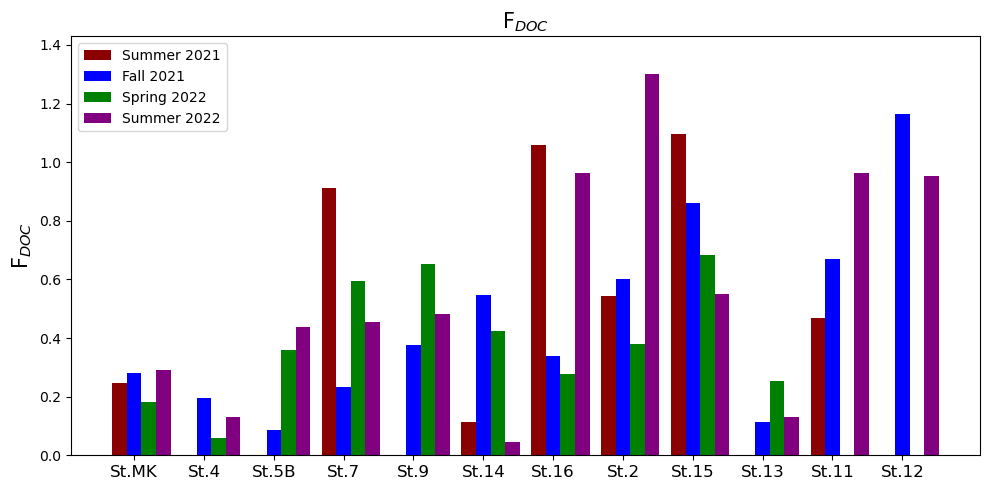

In [37]:
# Assuming df is your DataFrame
# Fix the calculation of tt_y_C and tt_y_OC
categories = ['St.MK', 'St.4', 'St.5B',
              'St.7', 'St.9', 'St.14',
              'St.16', 'St.2',
              'St.15', 'St.13', 'St.11', 'St.12']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

def bar_plot_stock(data_f, flux_col, ylabels, title): 
    df = data_f.dropna(subset=[flux_col])

    color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }

    barWidth = 0.25
    fig, ax = plt.subplots(figsize=(10, 5))

    # Adjusted r for spacing between groups
    r = np.arange(0, len(categories) * 1.2, 1.2)
    positions = [r + i * barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        for cat in categories:
            value = df[(df['Stn'] == cat) & (df['Camp'] == subcat)][flux_col].values
            if len(value) > 0:
                values.append(value[0])
            else:
                values.append(np.nan)  # Append NaN for missing values
            # Calculate errors, if needed
            # errors.append(YourErrorCalculationHere)

        ax.bar(pos, [v if v > 0 else 0 for v in values], width=barWidth, color=color_map[subcat],
               label=label_map[subcat])

    ax.set_ylim(0, df[flux_col].max() * 1.1)
    #ax.set_xlabel('Stations: East to West              Stations: North to South', size=15)
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r + 1*barWidth)
    ax.set_xticklabels(categories, size = 12)

    handles, _ = plt.gca().get_legend_handles_labels()
    labels = [label_map[subcat] for subcat in subcategories]
    ax.legend(handles[:len(subcategories)], labels)

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.savefig(f'../Dissertation_projects/Figures/Flux_figures/{save_name}.png')

    plt.show()

ylabes = 'F$_{DOC}$'
tlabes = 'F$_{DOC}$'
data_f = df
flux_col = "pw_flux_doc"
save_name = 'pw_flux_doc_bar_plot'


bar_plot_stock(data_f, flux_col, ylabes, tlabes) 

In [38]:
df.columns

Index(['camp', 'station', 'date', 'Max_pressure', 'Pressure_dbar_surface',
       'O2_mgL_surface', 'latitude_surface', 'longitude_surface',
       'Pressure_dbar_bottom', 'O2_mgL_bottom',
       ...
       'Fe2_m3_top', 'Fe3_m3_top', 'distance_to_delta_km',
       'distance_to_delta_lat_km', 'distance_to_delta_lon_km', 'Mix_depth_sal',
       'tt_y_C', 'tt_y_OC', 'tt_y_doc', 'tt_day_doc'],
      dtype='object', length=128)

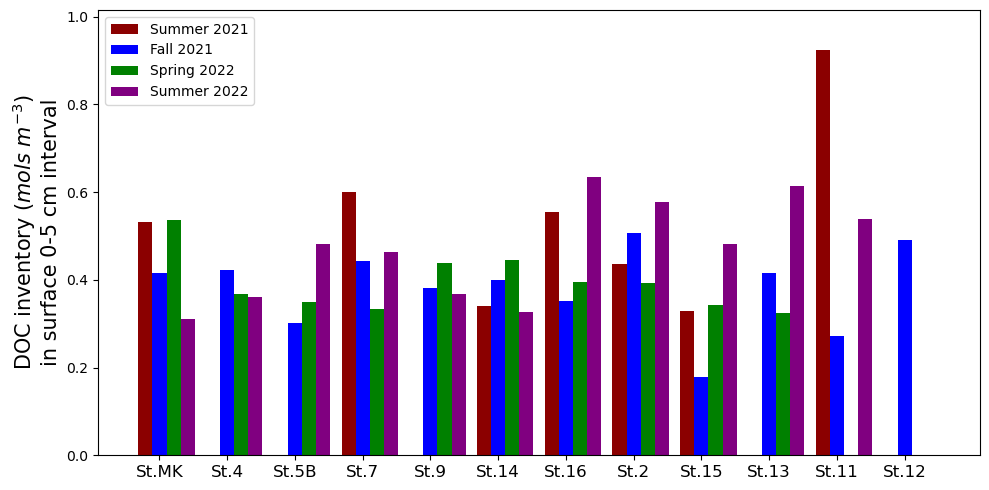

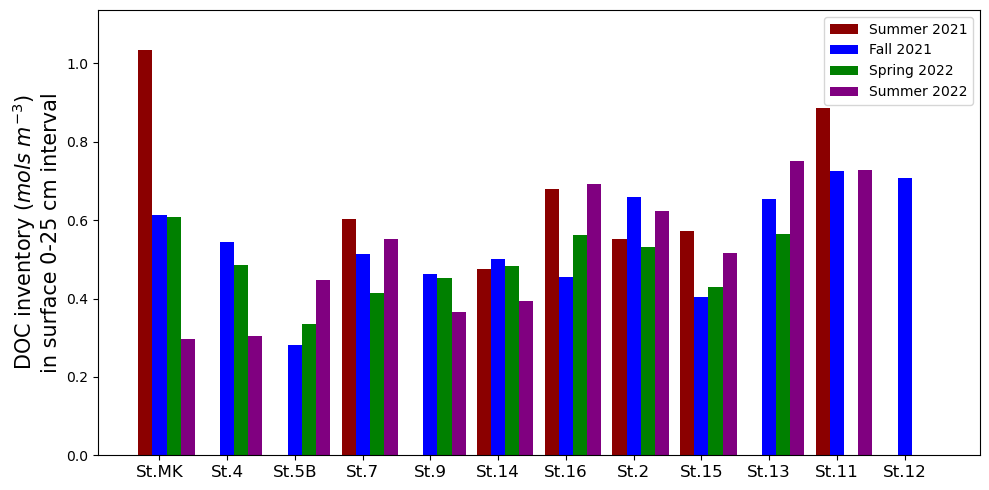

In [39]:

ylabes = r'DOC inventory $(mols$ $m^{-3})$'+'\n'+ 'in surface 0-5 cm interval'
tlabes = ''
data_f = df
flux_col = "doc_mol_per_m3_0_to_5cm"
save_name = 'pw_doc_ind_bar_plot'

bar_plot_stock(data_f, flux_col, ylabes, tlabes) 



ylabes = r'DOC inventory $(mols$ $m^{-3})$'+'\n'+ 'in surface 0-25 cm interval'
tlabes = ''
data_f = df
flux_col = "doc_mol_per_m3_0_to_25cm"
save_name = 'pw_doc_ind_bar_plot'

bar_plot_stock(data_f, flux_col, ylabes, tlabes) 

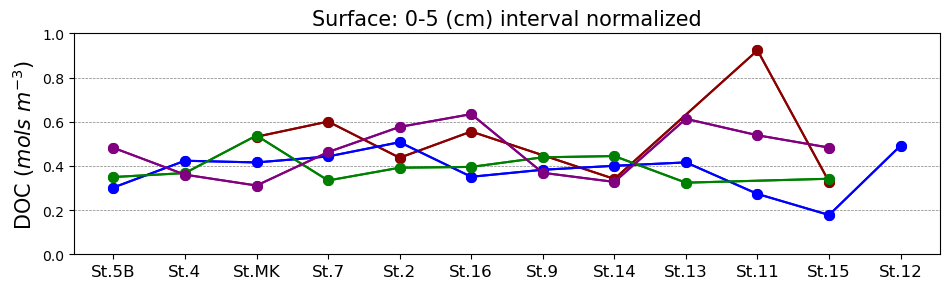

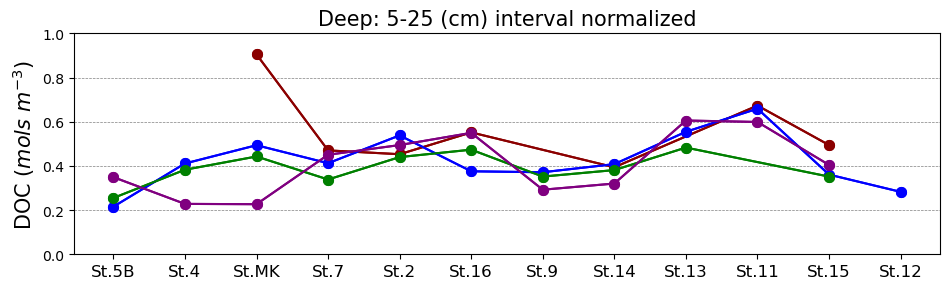

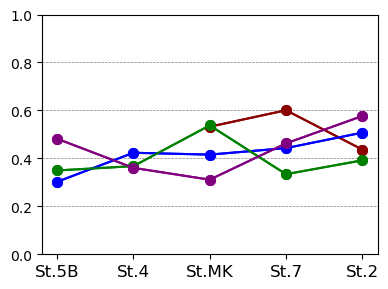

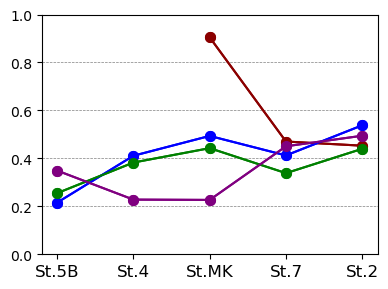

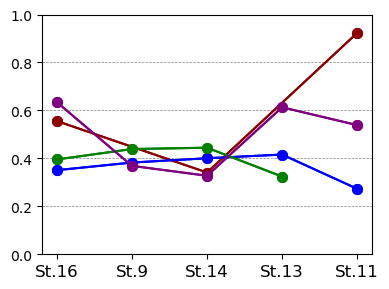

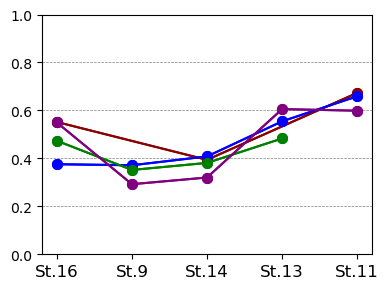

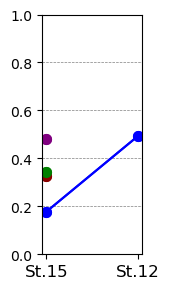

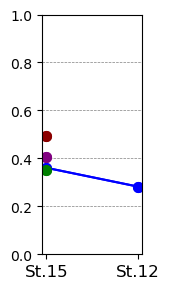

In [40]:
categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2', 'St.16', 'St.9', 'St.14', 'St.13', 'St.11', 'St.15', 'St.12']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def line_plot_stock(data_f, flux_col, ylabels, title): 
    df = data_f.dropna(subset=[flux_col])
    df = df[df[flux_col] > 0 ]

    color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }

    barWidth = 0  # Adjusted bar width for better spacing
    fig, ax = plt.subplots(figsize=(8/10*len(categories), 3))

    # Adjusted r for spacing between groups
    r = np.arange(len(categories))  # x locations for the groups
    positions = [r + i * barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        x_ticks = []
        for idx, cat in enumerate(categories):
            value = df[(df['Stn'] == cat) & (df['Camp'] == subcat)][flux_col].values
            error = df[(df['Stn'] == cat) & (df['Camp'] == subcat)][error_col].values
            if len(value) > 0:
                values.append(value[0])
                errors.append(error[0])
                x_ticks.append(idx)
            else:
                continue  # Skip if there is no value
        
        # Plot only if there are values to plot
        if values:
            ax.plot(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')
            ax.errorbar(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values, yerr= errors, xerr=None,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')

    ax.set_ylim(0, y_min_max_val)
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)  # Use the positions where data was actually plotted
    ax.set_xticklabels([cat for cat in categories], size=12)
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)  # Customizes color, style, and width
    ax.legend().remove()

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.savefig(f'../Dissertation_projects/Figures/DOC_paper_figs/{save_name}.png')

    plt.show()

# Define the parameters
y_min_max_val = 1

ylabes = r'DOC $(mols$ $m^{-3})$' 
tlabes = 'Surface: 0-5 (cm) interval normalized'
data_f = df
flux_col = "doc_mol_per_m3_0_to_5cm"
error_col = "doc_mol_per_m3_0_to_5cm_error"
save_name = 'pw_doc_ind_line_plot_0-5'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

# Define the parameters
ylabes = r'DOC $(mols$ $m^{-3})$' 
tlabes = 'Deep: 5-25 (cm) interval normalized'
data_f = df
flux_col = "doc_mol_per_m3_5_to_25cm"
error_col = "doc_mol_per_m3_5_to_25cm_error"
save_name = 'pw_doc_ind_line_plot_5-25'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

y_min_max_val = 1

ylabes = '' 
tlabes = ''
data_f = df
flux_col = "doc_mol_per_m3_0_to_5cm"
error_col = "doc_mol_per_m3_0_to_5cm_error"
save_name = 'pw_doc_ind_line_plot_0-5_1'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

# Define the parameters
ylabes = '' 
tlabes = ''
data_f = df
flux_col = "doc_mol_per_m3_5_to_25cm"
error_col = "doc_mol_per_m3_5_to_25cm_error"
save_name = 'pw_doc_ind_line_plot_5-25_1'

line_plot_stock(data_f, flux_col, ylabes, tlabes)


categories = [ 'St.16', 'St.9', 'St.14', 'St.13', 'St.11']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

y_min_max_val = 1

ylabes = '' 
tlabes = ''
data_f = df
flux_col = "doc_mol_per_m3_0_to_5cm"
error_col = "doc_mol_per_m3_0_to_5cm_error"
save_name = 'pw_doc_ind_line_plot_0-5_2'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

# Define the parameters
ylabes = '' 
tlabes = ''
data_f = df
flux_col = "doc_mol_per_m3_5_to_25cm"
error_col = "doc_mol_per_m3_5_to_25cm_error"
save_name = 'pw_doc_ind_line_plot_5-25_2'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

def line_plot_stock(data_f, flux_col, ylabels, title): 
    df = data_f.dropna(subset=[flux_col])
    df = df[df[flux_col] > 0 ]

    color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }

    barWidth = 0  # Adjusted bar width for better spacing
    fig, ax = plt.subplots(figsize=(len(categories)*8/9, 3))

    # Adjusted r for spacing between groups
    r = np.arange(len(categories))  # x locations for the groups
    positions = [r + i * barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        x_ticks = []
        for idx, cat in enumerate(categories):
            value = df[(df['Stn'] == cat) & (df['Camp'] == subcat)][flux_col].values
            error = df[(df['Stn'] == cat) & (df['Camp'] == subcat)][error_col].values
            if len(value) > 0:
                values.append(value[0])
                errors.append(error[0])
                x_ticks.append(idx)
            else:
                continue  # Skip if there is no value
        
        # Plot only if there are values to plot
        if values:
            ax.plot(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')
            ax.errorbar(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values, yerr= errors, xerr=None,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')

    ax.set_ylim(0, y_min_max_val)
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)  # Use the positions where data was actually plotted
    ax.set_xticklabels([cat for cat in categories], size=12)
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)  # Customizes color, style, and width
    ax.legend().remove()

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.savefig(f'../Dissertation_projects/Figures/DOC_paper_figs/{save_name}.png')

    plt.show()

# Define the parameters

categories = [ 'St.15', 'St.12']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

y_min_max_val = 1

ylabes = '' 
tlabes = ''
data_f = df
flux_col = "doc_mol_per_m3_0_to_5cm"
error_col = "doc_mol_per_m3_0_to_5cm_error"
save_name = 'pw_doc_ind_line_plot_0-5_3'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

# Define the parameters
ylabes = '' 
tlabes = ''
data_f = df
flux_col = "doc_mol_per_m3_5_to_25cm"
error_col = "doc_mol_per_m3_5_to_25cm_error"
save_name = 'pw_doc_ind_line_plot_5-25_3'

line_plot_stock(data_f, flux_col, ylabes, tlabes)


In [41]:
data_ncs_stocks = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/NCS_stocks.csv')
data_ncs_stocks['OC:TN_5cm'] = (data_ncs_stocks['OCg_5cm_deep/M2'] /12) / (data_ncs_stocks['Ng_5cm_deep/M2']/14)
data_ncs_stocks['OC:TN_5_25cm'] = (data_ncs_stocks['OCg_5_25cm_deep/M2']/12) / (data_ncs_stocks['Ng_5_25cm_deep/M2']/14)

data_ncs_stocks['OC:TN_5cm_error'] = (data_ncs_stocks['OCg_5cm_deep/M2_error'] /12) / (data_ncs_stocks['Ng_5cm_deep/M2_error']/14)
data_ncs_stocks['OC:TN_5_25cm_error'] = (data_ncs_stocks['OCg_5_25cm_deep/M2_error']/12) / (data_ncs_stocks['Ng_5_25cm_deep/M2_error']/14)

data_ncs_stocks.index = data_ncs_stocks['code']

doctn5cm = df['DOC:TDN_5cm'] 
doctn525cm = df['DOC:TDN_5-25cm'] 

data_ncs_stocks['DOC:TDN_5cm']  = doctn5cm
data_ncs_stocks['DOC:TDN_5-25cm']  = doctn525cm


data_ncs_stocks['DOC:TDN_OC:TN_5cm'] = data_ncs_stocks['DOC:TDN_5cm'] / data_ncs_stocks['OC:TN_5cm'] 
data_ncs_stocks['DOC:TDN_OC:TN_5-25cm'] = data_ncs_stocks['DOC:TDN_5-25cm'] / data_ncs_stocks['OC:TN_5_25cm'] 


data_ncs_stocks

KeyError: 'DOC:TDN_5cm'

In [ ]:
categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2', 'St.16', 'St.9', 'St.14', 'St.13', 'St.11', 'St.15', 'St.12']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def line_plot_stock(data_f, flux_col, ylabels, title): 
    df = data_f.dropna(subset=[flux_col])
    df = df[df[flux_col] > 0 ]

    color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }

    barWidth = 0  # Adjusted bar width for better spacing
    fig, ax = plt.subplots(figsize=(8/10*len(categories), 3))

    # Adjusted r for spacing between groups
    r = np.arange(len(categories))  # x locations for the groups
    positions = [r + i * barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        x_ticks = []
        for idx, cat in enumerate(categories):
            value = df[(df['Stn'] == cat) & (df['Camp'] == subcat)][flux_col].values
            error = df[(df['Stn'] == cat) & (df['Camp'] == subcat)][error_col].values
            if len(value) > 0:
                values.append(value[0])
                errors.append(error[0])
                x_ticks.append(idx)
            else:
                continue  # Skip if there is no value
        
        # Plot only if there are values to plot
        if values:
            ax.plot(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')
            ax.errorbar(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values, yerr= errors, xerr=None,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')

    ax.set_ylim(0, y_min_max_val)
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)  # Use the positions where data was actually plotted
    ax.set_xticklabels([cat for cat in categories], size=12)
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)  # Customizes color, style, and width
    ax.legend().remove()

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.savefig(f'../Dissertation_projects/Figures/DOC_paper_figs/{save_name}.png')

    plt.show()

y_min_max_val = 20

ylabes = r'DOC:TDN' 
tlabes = 'Surface: 0-5 (cm) interval normalized'
data_f = df
flux_col = "DOC:TDN_5cm"
error_col = "DOC:TDN_5cm_error"
save_name = 'pw_doc_tdn_ind_line_plot_0-5'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

# Define the parameters
ylabes = r'DOC:TDN' 
tlabes = 'Deep: 5-25 (cm) interval normalized'
data_f = df
flux_col = "DOC:TDN_5-25cm"
error_col = "DOC:TDN_5-25cm_error"
save_name = 'pw_doc_tdn_ind_line_plot_5-25'

categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

y_min_max_val = 20

ylabes = '' 
tlabes = ''
data_f = df
flux_col = "DOC:TDN_5cm"
error_col = "DOC:TDN_5cm_error"
save_name = 'pw_doc_tdn_ind_line_plot_0-5_1'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

# Define the parameters
ylabes = '' 
tlabes = ''
data_f = df
flux_col = "DOC:TDN_5-25cm"
error_col = "DOC:TDN_5-25cm_error"
save_name = 'pw_doc_tdn_ind_line_plot_5-25_1'

line_plot_stock(data_f, flux_col, ylabes, tlabes)


categories = [ 'St.16', 'St.9', 'St.14', 'St.13', 'St.11']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

y_min_max_val = 20

ylabes = '' 
tlabes = ''
data_f = df
flux_col = "DOC:TDN_5cm"
error_col = "DOC:TDN_5cm_error"
save_name = 'pw_doc_tdn_ind_line_plot_0-5_2'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

# Define the parameters
ylabes = '' 
tlabes = ''
data_f = df
flux_col = "DOC:TDN_5-25cm"
error_col = "DOC:TDN_5-25cm_error"
save_name = 'pw_doc_tdn_ind_line_plot_5-25_2'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

line_plot_stock(data_f, flux_col, ylabes, tlabes)

def line_plot_stock(data_f, flux_col, ylabels, title): 
    df = data_f.dropna(subset=[flux_col])
    df = df[df[flux_col] > 0 ]

    color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }

    barWidth = 0  # Adjusted bar width for better spacing
    fig, ax = plt.subplots(figsize=(len(categories)*8/9, 3))

    # Adjusted r for spacing between groups
    r = np.arange(len(categories))  # x locations for the groups
    positions = [r + i * barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        x_ticks = []
        for idx, cat in enumerate(categories):
            value = df[(df['Stn'] == cat) & (df['Camp'] == subcat)][flux_col].values
            error = df[(df['Stn'] == cat) & (df['Camp'] == subcat)][error_col].values
            if len(value) > 0:
                values.append(value[0])
                errors.append(error[0])
                x_ticks.append(idx)
            else:
                continue  # Skip if there is no value
        
        # Plot only if there are values to plot
        if values:
            ax.plot(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')
            ax.errorbar(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values, yerr= errors, xerr=None,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')

    ax.set_ylim(0, y_min_max_val)
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)  # Use the positions where data was actually plotted
    ax.set_xticklabels([cat for cat in categories], size=12)
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)  # Customizes color, style, and width
    ax.legend().remove()

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.savefig(f'../Dissertation_projects/Figures/DOC_paper_figs/{save_name}.png')

    plt.show()

# Define the parameters

categories = [ 'St.15', 'St.12']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

y_min_max_val = 20

ylabes = '' 
tlabes = ''
data_f = df
flux_col = "DOC:TDN_5cm"
error_col = "DOC:TDN_5cm_error"
save_name = 'pw_doc_tdn_ind_line_plot_0-5_3'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

# Define the parameters
ylabes = '' 
tlabes = ''
data_f = df
flux_col = "DOC:TDN_5-25cm"
error_col = "DOC:TDN_5-25cm_error"
save_name = 'pw_doc_tdn_ind_line_plot_5-25_3'

line_plot_stock(data_f, flux_col, ylabes, tlabes)


In [ ]:
df.columns

In [ ]:
df['pw_flux_doc_error']

In [ ]:
categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2', 'St.16', 'St.9', 'St.14', 'St.13', 'St.11', 'St.15', 'St.12']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']
# Define the parameters
y_min_max_val = 2

tlabes = ''
ylabes = r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$'
data_f = df
flux_col = "pw_flux_doc"
error_col = "pw_flux_doc_error"
save_name = 'pw_flux_doc_line_plot'

line_plot_stock(data_f, flux_col, ylabes, tlabes)


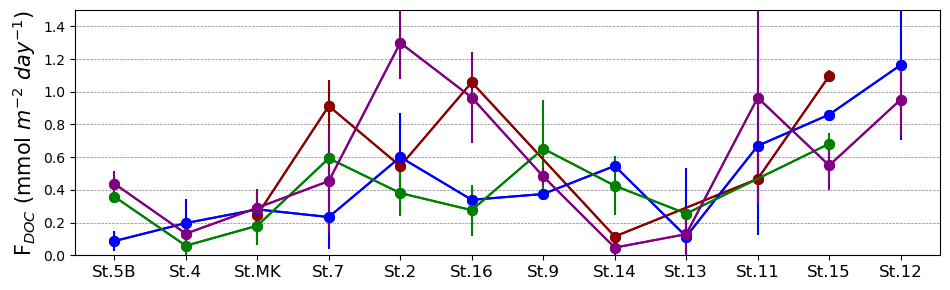

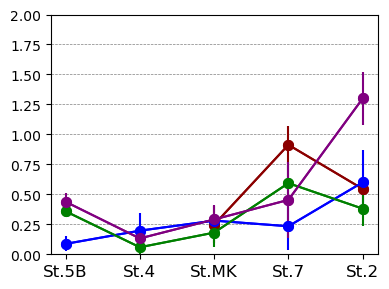

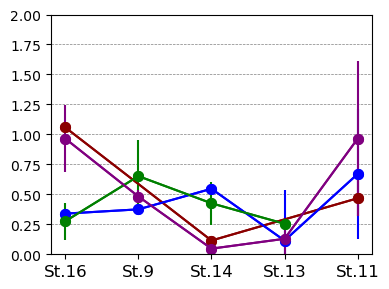

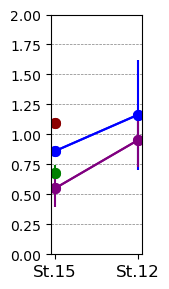

In [43]:
categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2', 'St.16', 'St.9', 'St.14', 'St.13', 'St.11', 'St.15', 'St.12']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def line_plot_stock(data_f, flux_col, ylabels, title): 
    df = data_f.dropna(subset=[flux_col])
    df = df[df[flux_col] > 0 ]
    df = df[df[flux_col] < 100]

    color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }

    barWidth = 0  # Adjusted bar width for better spacing
    fig, ax = plt.subplots(figsize=(8/10*len(categories), 3))

    # Adjusted r for spacing between groups
    r = np.arange(len(categories))  # x locations for the groups
    positions = [r + i * barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        x_ticks = []
        for idx, cat in enumerate(categories):
            value = df[(df['station'] == cat) & (df['camp'] == subcat)][flux_col].values
            error = df[(df['station'] == cat) & (df['camp'] == subcat)][error_col].values
            if len(value) > 0:
                values.append(value[0])
                errors.append(error[0])
                x_ticks.append(idx)
            else:
                continue  # Skip if there is no value
        
        # Plot only if there are values to plot
        if values:
            ax.plot(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')
            ax.errorbar(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values, yerr= errors, xerr=None,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')

    ax.set_ylim(0, y_min_max_val)
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)  # Use the positions where data was actually plotted
    ax.set_xticklabels([cat for cat in categories], size=12)
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)  # Customizes color, style, and width
    ax.legend().remove()

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.savefig(f'../Dissertation_projects/Figures/DOC_paper_figs/{save_name}.png')

    plt.show()

y_min_max_val = 1.5

tlabes = ''
ylabes = r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$'
data_f = df
flux_col = "pw_flux_doc"
error_col = "pw_flux_doc_error"
save_name = 'pw_flux_doc_line_plot'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

y_min_max_val = 2

tlabes = ''
ylabes = ''
data_f = df
flux_col = "pw_flux_doc"
error_col = "pw_flux_doc_error"
save_name = 'pw_flux_doc_line_plot_1'

line_plot_stock(data_f, flux_col, ylabes, tlabes)


categories = [ 'St.16', 'St.9', 'St.14', 'St.13', 'St.11']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

y_min_max_val = 2

tlabes = ''
ylabes = ''
data_f = df
flux_col = "pw_flux_doc"
error_col = "pw_flux_doc_error"
save_name = 'pw_flux_doc_line_plot_2'

line_plot_stock(data_f, flux_col, ylabes, tlabes)


def line_plot_stock(data_f, flux_col, ylabels, title): 
    df = data_f.dropna(subset=[flux_col])
    df = df[df[flux_col] > 0 ]

    color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }

    barWidth = 0  # Adjusted bar width for better spacing
    fig, ax = plt.subplots(figsize=(len(categories)*8/9, 3))

    # Adjusted r for spacing between groups
    r = np.arange(len(categories))  # x locations for the groups
    positions = [r + i * barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        x_ticks = []
        for idx, cat in enumerate(categories):
            value = df[(df['station'] == cat) & (df['camp'] == subcat)][flux_col].values
            error = df[(df['station'] == cat) & (df['camp'] == subcat)][error_col].values
            if len(value) > 0:
                values.append(value[0])
                errors.append(error[0])
                x_ticks.append(idx)
            else:
                continue  # Skip if there is no value
        
        # Plot only if there are values to plot
        if values:
            ax.plot(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')
            ax.errorbar(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values, yerr= errors, xerr=None,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')

    ax.set_ylim(0, y_min_max_val)
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)  # Use the positions where data was actually plotted
    ax.set_xticklabels([cat for cat in categories], size=12)
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)  # Customizes color, style, and width
    ax.legend().remove()

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.savefig(f'../Dissertation_projects/Figures/DOC_paper_figs/{save_name}.png')

    plt.show()

# Define the parameters

categories = [ 'St.15', 'St.12']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']

y_min_max_val = 2

tlabes = ''
ylabes = ''
data_f = df
flux_col = "pw_flux_doc"
error_col = "pw_flux_doc_error"
save_name = 'pw_flux_doc_line_plot_3'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

In [ ]:
data_f.columns

In [ ]:
mean_doc_tdn_5cm = df.groupby('rgn')['DOC:TDN_5cm'].mean().reset_index()

mean_doc_tdn_5cm

In [ ]:
mean_doc_tdn_25cm = df.groupby('rgn')['DOC:TDN_5-25cm'].mean().reset_index()

mean_doc_tdn_25cm

In [ ]:
categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2', 'St.16', 'St.9', 'St.14', 'St.13', 'St.11', 'St.15', 'St.12']
subcategories = ['GOM2021','GOM21FA', 'GOM22SP', 'GOM22SU']


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def line_plot_stock(data_f, flux_col, ylabels, title): 
    df = data_f.dropna(subset=[flux_col])
    df = df[df[flux_col] > 0 ]
    df = df[df[flux_col] < 100]

    color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }

    barWidth = 0  # Adjusted bar width for better spacing
    fig, ax = plt.subplots(figsize=(8/10*len(categories), 3))

    # Adjusted r for spacing between groups
    r = np.arange(len(categories))  # x locations for the groups
    positions = [r + i * barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        x_ticks = []
        for idx, cat in enumerate(categories):
            value = df[(df['station'] == cat) & (df['camp'] == subcat)][flux_col].values
            error = df[(df['station'] == cat) & (df['camp'] == subcat)][error_col].values
            if len(value) > 0:
                values.append(value[0])
                errors.append(error[0])
                x_ticks.append(idx)
            else:
                continue  # Skip if there is no value
        
        # Plot only if there are values to plot
        if values:
            ax.plot(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')
            ax.errorbar(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values, yerr= errors, xerr=None,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')

    ax.set_ylim(0, y_min_max_val)
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)  # Use the positions where data was actually plotted
    ax.set_xticklabels([cat for cat in categories], size=12)
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)  # Customizes color, style, and width
    ax.legend().remove()

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.savefig(f'../Dissertation_projects/Figures/DOC_paper_figs/{save_name}.png')

    plt.show()

df['percent_prez'] = (df['pw_flux_doc'] / (df['dic_flux'] + df['pw_flux_doc'])) *100 

# Define the parameters
y_min_max_val = 100

tlabes = r'F$_{DOC}$ / Flux DIC'
ylabes = r'%'
data_f = df
flux_col = "percent_prez"
save_name = 'percent_prez_line_plot'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

In [ ]:
data_ncs_stocks['DOC:TDN_OC:TN_5cm'].mean()

In [ ]:
color_map = {
    'GOM2021': 'darkred',
    'GOM21FA': 'blue',
    'GOM22SP': 'green',
    'GOM22SU': 'purple'
}


marker_map = {
    'St.11': 'p',
    'St.14': 'v',
    'St.2': 's',
    'St.7': 'o',
    'St.9': '*',
    'St.5B': 'd'
}

label_map = {
    'GOM2021': 'Summer 2021',
    'GOM21FA': 'Fall 2021',
    'GOM22SP': 'Spring 2022',
    'GOM22SU': 'Summer 2022'
}

def xyplotcolor_cat_color(df):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    model = LinearRegression()
    sub = df.dropna(subset=[x_var, y_var])
    data = sub[[x_var, y_var, z_var, 'Stn']]
    subcat = data['Camp'].tolist()
    subrgn = data['Stn'].tolist()

    X = data[[x_var]]
    y = data[y_var]
    model.fit(X, y)
    score = model.score(X, y)
    
    for campaign in data[z_var].unique():
        for stn in data['Stn'].unique():
            subset = data[(data[z_var] == campaign) & (data['Stn'] == stn)]
            sns.scatterplot(
                x=subset[x_var], 
                y=subset[y_var], 
                marker=marker_map.get(stn, 'o'), 
                color=color_map.get(campaign, 'grey'), 
                label=f"{label_map.get(campaign, campaign)} ({stn})",
                s=100, 
                edgecolor='black', 
                linewidth=1.5, alpha = 0.7, 
                ax=axes, 
                legend=False
            )
    
    axes.set_xlabel(x_var_lab, size=15)
    axes.set_ylabel(y_var_lab, size=15)
    
    axes.set_xlim(data[x_var].min()*.9, data[x_var].max()*1.1)
    axes.set_ylim(data[y_var].min()*.9, data[y_var].max()*1.1)

    axes.set_title(titel, size=15)
    
    #plt.savefig(f'../Dissertation_projects/Figures/CTD_profiles/{save_name}.png')
    plt.show()

    
y_var = 'DOC:TDN_OC:TN_5cm'
y_var_lab = r'DOC:TDN/OC:TN 0-5 cm interval'

x_var = 'DOC:TDN_OC:TN_5-25cm'
x_var_lab = 'DOC:TDN/OC:TN 5-25 cm interval'

z_var = 'Camp'

titel = "  "
xyplotcolor_cat_color(data_ncs_stocks)


categories = ['St.5B', 'St.7', 'St.2', 'St.9', 'St.14', 'St.11']
subcategories = ['GOM21FA', 'GOM22SP', 'GOM22SU']


def line_plot_stock(data_f, flux_col, ylabels, title): 
    df = data_f.dropna(subset=[flux_col])
    df = df[df[flux_col] > 0 ]

    color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }

    barWidth = 0  # Adjusted bar width for better spacing
    fig, ax = plt.subplots(figsize=(6, 3))

    # Adjusted r for spacing between groups
    r = np.arange(len(categories))  # x locations for the groups
    positions = [r + i * barWidth for i in range(len(subcategories))]

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        x_ticks = []
        for idx, cat in enumerate(categories):
            value = df[(df['Stn'] == cat) & (df['Camp'] == subcat)][flux_col].values
            error = df[(df['Stn'] == cat) & (df['Camp'] == subcat)][error_col].values
            if len(value) > 0:
                values.append(value[0])
                errors.append(error[0])
                x_ticks.append(idx)
            else:
                continue  # Skip if there is no value
        
        # Plot only if there are values to plot
        if values:
            ax.plot(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')
            ax.errorbar(np.array(x_ticks) + barWidth * (subcategories.index(subcat) - len(subcategories)/2), values, yerr= errors, xerr=None,
                    color=color_map[subcat], label=label_map[subcat], markersize=7, marker='o')

    ax.set_ylim(0, 4.5)
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)  # Use the positions where data was actually plotted
    ax.set_xticklabels([cat for cat in categories], size=12)
    ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)  # Customizes color, style, and width
    ax.legend().remove()

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.savefig(f'../Dissertation_projects/Figures/Flux_figures/Solid_phase_{save_name}.png')

    plt.show()

# Define the parameters
ylabes = r'DOC:TDN/OC:TN' 
tlabes = '0-5 (cm) interval'
data_f = data_ncs_stocks
flux_col = "DOC:TDN_OC:TN_5cm"
save_name = 'DOC_TDN_OC_TN_0_5cm'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

# Define the parameters
ylabes = r'DOC:TDN/OC:TN' 
tlabes = '5-25 (cm) interval'
data_f = data_ncs_stocks
flux_col = "DOC:TDN_OC:TN_5-25cm"
save_name = 'DOC_TDN_OC_TN_5_25cm'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

In [ ]:
df['top:bot_core_DOC'] = df['doc_mol_per_m3_0_to_5cm'] / df['doc_mol_per_m3_5_to_25cm']
 
# Define the parameters
y_min_max_val = 2

ylabes = r'top:bot_core_DOC' 
tlabes = 'top:bot_core_DOCn'
data_f = df
flux_col = "top:bot_core_DOC"
save_name = 'top:bot_core_DOC'

line_plot_stock(data_f, flux_col, ylabes, tlabes)

df['pw_flux_doc']

In [ ]:

categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2', 'St.16', 'St.9', 'St.14', 'St.13', 'St.11', 'St.15', 'St.12']

def bar_plot_dual_bars(data_f, x_col, y_col1, y_col2, ylabels, title, save_name, y_col_lab1, y_col_lab2, color1, color2):
    df = data_f.copy()

    # Ensure only relevant categories are included and missing categories are filled with zeros
    df = df[df['Stn'].isin(categories)]
    df = df.set_index('Stn')  # Set the index to 'Stn' for reindexing
    df = df.reindex(categories)  # Reindex to include all categories
    df.fillna(0, inplace=True)  # Fill missing values with zero

    barWidth = 0.35  # Width of each bar
    r = np.arange(len(df))  # The location for the groups
    positions1 = r - barWidth / 2  # Positions for the first set of bars
    positions2 = r + barWidth / 2  # Positions for the second set of bars

    fig, ax = plt.subplots(figsize=(8, 5))

    # Plot the bars
    ax.bar(positions1, df[y_col1], color=color1, width=barWidth, edgecolor='grey', label=y_col_lab1)
    ax.bar(positions2, df[y_col2], color=color2, width=barWidth, edgecolor='grey', label=y_col_lab2)

    # Add labels and title
    ax.set_xlabel('')
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)
    ax.set_xticklabels(categories, size=12)
    ax.legend(loc='upper left')
    ax.set_ylim(0, 1.25)  # Adjust y-limit based on max values

    fig.set_facecolor('w')
    plt.tight_layout()

    # Save and show plot
    plt.savefig(f'../Dissertation_projects/Figures/Flux_figures/{save_name}.png')
    plt.show()

# Define labels, title, and file name
ylabel = r'DOC inventory $(mols$ $m^{-3})$'


# List of datasets to plot
datasets = [
    ('GOM2021', 'Summer 2021', 'pw_doc_ind_bar_plot_GOM2021', 'darkred', '#4a1915'),
    ('GOM21FA', 'Fall 2021', 'pw_doc_ind_bar_plot_GOM21FA', 'blue', '#15154a'),
    ('GOM22SP', 'Spring 2022', 'pw_doc_ind_bar_plot_GOM22SP', 'green', '#193617'),
    ('GOM22SU', 'Summer 2022', 'pw_doc_ind_bar_plot_GOM22SU', 'purple', '#210c36')
]

# Iterate over each dataset and create plots
for camp, title, save_name, color1, color2 in datasets:
    data_f = df[df['Camp'] == camp]
    bar_plot_dual_bars(data_f, 'Stn', 'doc_mol_per_m3_0_to_5cm', 'doc_mol_per_m3_0_to_25cm',
                       ylabel, title, save_name, 'Surface: 0-5 cm interval', 'Full: core 0-25 cm interval',
                       color1, color2)


In [ ]:

categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2', 'St.16', 'St.9', 'St.14', 'St.13', 'St.11', 'St.15', 'St.12']

def bar_plot_dual_bars(data_f, x_col, y_col1, y_col2, ylabels, title, save_name, y_col_lab1, y_col_lab2, color1, color2):
    df = data_f.copy()

    # Ensure only relevant categories are included and missing categories are filled with zeros
    df = df[df['Stn'].isin(categories)]
    df = df.set_index('Stn')  # Set the index to 'Stn' for reindexing
    df = df.reindex(categories)  # Reindex to include all categories
    df.fillna(0, inplace=True)  # Fill missing values with zero

    barWidth = 0.35  # Width of each bar
    r = np.arange(len(df))  # The location for the groups
    positions1 = r - barWidth / 2  # Positions for the first set of bars
    positions2 = r + barWidth / 2  # Positions for the second set of bars

    fig, ax = plt.subplots(figsize=(8, 5))

    # Plot the bars
    ax.bar(positions1, df[y_col1], color=color1, width=barWidth, edgecolor='grey', label=y_col_lab1)
    ax.bar(positions2, df[y_col2], color=color2, width=barWidth, edgecolor='grey', label=y_col_lab2)

    # Add labels and title
    ax.set_xlabel('')
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)
    ax.set_xticklabels(categories, size=12)
    ax.legend(loc='upper left')
    ax.set_ylim(0, 1.25)  # Adjust y-limit based on max values

    fig.set_facecolor('w')
    plt.tight_layout()

    # Save and show plot
    plt.savefig(f'../Dissertation_projects/Figures/Flux_figures/{save_name}.png')
    plt.show()

# Define labels, title, and file name
ylabel = r'DOC inventory $(mols$ $m^{-3})$'


# List of datasets to plot
datasets = [
    ('GOM2021', 'Summer 2021', 'pw_doc_ind_bar_plot2_GOM2021', 'darkred', '#4a1915'),
    ('GOM21FA', 'Fall 2021', 'pw_doc_ind_bar_plot2_GOM21FA', 'blue', '#15154a'),
    ('GOM22SP', 'Spring 2022', 'pw_doc_ind_bar_plot2_GOM22SP', 'green', '#193617'),
    ('GOM22SU', 'Summer 2022', 'pw_doc_ind_bar_plot2_GOM22SU', 'purple', '#210c36')
]

# Iterate over each dataset and create plots
for camp, title, save_name, color1, color2 in datasets:
    data_f = df[df['Camp'] == camp]
    bar_plot_dual_bars(data_f, 'Stn', 'doc_mol_per_m3_0_to_5cm', 'doc_mol_per_m3_5_to_25cm',
                       ylabel, title, save_name, 'Surface: 0-5 cm interval', 'Deep: core 5-25 cm interval',
                       color1, color2)


In [ ]:

categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2', 'St.16', 'St.9', 'St.14', 'St.13', 'St.11', 'St.15', 'St.12']

def bar_plot_dual_bars(data_f, x_col, y_col1, y_col2, ylabels, title, save_name, y_col_lab1, y_col_lab2, color1, color2):
    df = data_f.copy()

    # Ensure only relevant categories are included and missing categories are filled with zeros
    df = df[df['Stn'].isin(categories)]
    df = df.set_index('Stn')  # Set the index to 'Stn' for reindexing
    df = df.reindex(categories)  # Reindex to include all categories
    df.fillna(0, inplace=True)  # Fill missing values with zero

    barWidth = 0.35  # Width of each bar
    r = np.arange(len(df))  # The location for the groups
    positions1 = r - barWidth / 2  # Positions for the first set of bars
    positions2 = r + barWidth / 2  # Positions for the second set of bars

    fig, ax = plt.subplots(figsize=(8, 5))

    # Plot the bars
    ax.bar(positions1, df[y_col1], color=color1, width=barWidth, edgecolor='grey', label=y_col_lab1)
    ax.bar(positions2, df[y_col2], color=color2, width=barWidth, edgecolor='grey', label=y_col_lab2)

    # Add labels and title
    ax.set_xlabel('')
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)
    ax.set_xticklabels(categories, size=12)
    ax.legend(loc='upper left')
    ax.set_ylim(0, .07)  # Adjust y-limit based on max values

    fig.set_facecolor('w')
    plt.tight_layout()

    # Save and show plot
    plt.savefig(f'../Dissertation_projects/Figures/Flux_figures/{save_name}.png')
    plt.show()

# Define labels, title, and file name
ylabel = r'DOC inventory $(mols$ $m^{-3})$'


# List of datasets to plot
datasets = [
    ('GOM2021', 'Summer 2021', 'pw_fe2_ind_bar_plot_GOM2021', 'darkred', '#4a1915'),
    ('GOM21FA', 'Fall 2021', 'pw_fe2_ind_bar_plot_GOM21FA', 'blue', '#15154a'),
    ('GOM22SP', 'Spring 2022', 'pw_fe2_ind_bar_plot_GOM22SP', 'green', '#193617'),
    ('GOM22SU', 'Summer 2022', 'pw_fe2_ind_bar_plot_GOM22SU', 'purple', '#210c36')
]

# Iterate over each dataset and create plots
for camp, title, save_name, color1, color2 in datasets:
    data_f = df[df['Camp'] == camp]
    bar_plot_dual_bars(data_f, 'Stn', 'fe2_mol_per_m3_0_to_5cm', 'fe2_mol_per_m3_0_to_25cm',
                       ylabel, title, save_name, 'Surface: 0-5 cm interval', 'Full: core 0-25 cm interval',
                       color1, color2)


In [ ]:

categories = ['St.5B',  'St.7', 'St.2', 'St.9', 'St.14', 'St.11']

def bar_plot_dual_bars(data_f, x_col, y_col1, y_col2, ylabels, title, save_name, y_col_lab1, y_col_lab2, color1, color2):
    df = data_f.copy()

    # Ensure only relevant categories are included and missing categories are filled with zeros
    df = df[df['Stn'].isin(categories)]
    df = df.set_index('Stn')  # Set the index to 'Stn' for reindexing
    df = df.reindex(categories)  # Reindex to include all categories
    df.fillna(0, inplace=True)  # Fill missing values with zero

    barWidth = 0.35  # Width of each bar
    r = np.arange(len(df))  # The location for the groups
    positions1 = r - barWidth / 2  # Positions for the first set of bars
    positions2 = r + barWidth / 2  # Positions for the second set of bars

    fig, ax = plt.subplots(figsize=(5, 5))

    # Plot the bars
    ax.bar(positions1, df[y_col1], color=color1, width=barWidth, edgecolor='grey', label=y_col_lab1)
    ax.bar(positions2, df[y_col2], color=color2, width=barWidth, edgecolor='grey', label=y_col_lab2)

    # Add labels and title
    ax.set_xlabel('')
    ax.set_ylabel(ylabels, size=15)
    ax.set_title(title, size=15)
    ax.set_xticks(r)
    ax.set_xticklabels(categories, size=12)
    ax.legend(loc='upper left')
    ax.set_ylim(0, 9)  # Adjust y-limit based on max values

    fig.set_facecolor('w')
    plt.tight_layout()

    # Save and show plot
    plt.savefig(f'../Dissertation_projects/Figures/Flux_figures/{save_name}.png')
    plt.show()

# Define labels, title, and file name
ylabel =  r'C$_{org}$ inventory $(kg$ $m^{-3})$'


color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }


# List of datasets to plot
datasets = [
    #('GOM2021', 'Summer 2021', 'pw_corg_ind_bar_plot_GOM21FA', 'darkred', '#4a1915'),
    ('GOM21FA', 'Fall 2021', 'pw_corg_ind_bar_plot_GOM21FA', 'blue', '#15154a'),
    ('GOM22SP', 'Spring 2022', 'pw_corg_ind_bar_plot_GOM22SP', 'green', '#193617'),
    ('GOM22SU', 'Summer 2022', 'pw_corg_ind_bar_plot_GOM22SU', 'purple', '#210c36')
]

# Iterate over each dataset and create plots
for camp, title, save_name, color1, color2 in datasets:
    data_f = df[df['Camp'] == camp]
    bar_plot_dual_bars(data_f, 'Stn', 'OCkg_5cm_deep_M3', 'OCkg_25cm_deep_M3',
                       ylabel, title, save_name, 'Surface: 0-5 cm interval', 'Full: core 0-25 cm interval',
                       color1, color2)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the list of categories
categories = ['St.5B',  'St.7', 'St.2', 'St.9', 'St.14', 'St.11']

def bar_plot_dual_bars(data_f, x_col, y_col1, y_col2, ylabels, title, save_name, y_col_lab1, y_col_lab2, color1, color2):
    df = data_f.copy()

    # Ensure only relevant categories are included and missing categories are filled with zeros
    df = df[df['Stn'].isin(categories)]
    df = df.set_index('Stn')  # Set the index to 'Stn' for reindexing
    df = df.reindex(categories)  # Reindex to include all categories
    df.fillna(0, inplace=True)  # Fill missing values with zero

    barWidth = 0.35  # Width of each bar
    r = np.arange(len(df))  # The location for the groups
    positions1 = r - barWidth / 2  # Positions for the first set of bars
    positions2 = r + barWidth / 2  # Positions for the second set of bars

    fig, ax1 = plt.subplots(figsize=(5, 5))

    # Plot the first set of bars on the primary y-axis
    ax1.bar(positions1, df[y_col1], color=color1, width=barWidth, edgecolor='grey', label=y_col_lab1)
    ax1.set_ylabel(y_col_lab1, color=color1, size=15)  # Label the primary y-axis
    ax1.tick_params(axis='y', labelcolor=color1)

    # Create a secondary y-axis
    ax2 = ax1.twinx()

    # Plot the second set of bars on the secondary y-axis
    ax2.bar(positions2, df[y_col2], color=color2, width=barWidth, edgecolor='grey', label=y_col_lab2)
    ax2.set_ylabel(y_col_lab2, color=color2, size=15)  # Label the secondary y-axis
    ax2.tick_params(axis='y', labelcolor=color2)

    # Add labels, title, and legend
    ax1.set_xlabel('')
    ax1.set_xticks(r)
    ax1.set_xticklabels(categories, size=12)
    ax1.set_title(title, size=15)


    ax1.set_ylim(0, 12.75)
    ax2.set_ylim(0, 17)
    
    fig.set_facecolor('w')
    plt.tight_layout()

    # Save and show the plot
    #plt.savefig(f'../Dissertation_projects/Figures/Flux_figures/{save_name}.png')
    plt.show()

# Define labels, title, and file name
ylabel = r'DOC inventory $(mols$ $m^{-3})$'

color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

# List of datasets to plot
datasets = [
    #('GOM2021', 'Summer 2021', 'pw_flx_ind_bar_plot_GOM2021', 'darkred', '#4a1915'),
    ('GOM21FA', 'Fall 2021', 'pw_flx_ind_bar_plot_GOM21FA', 'blue', '#15154a'),
    ('GOM22SP', 'Spring 2022', 'pw_flx_ind_bar_plot_GOM22SP', 'green', '#193617'),
    ('GOM22SU', 'Summer 2022', 'pw_flx_ind_bar_plot_GOM22SU', 'purple', '#210c36')
]

# Iterate over each dataset and create plots
for camp, title, save_name, color1, color2 in datasets:
    data_f = df[df['Camp'] == camp]
    bar_plot_dual_bars(data_f, 'Stn', 'OCkg_5cm_deep_M3', 'pw_flux_doc',
                       ylabel, title, save_name, 'Surface: 0-5 cm interval' ,
                       r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$', color1, color2)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the list of categories
categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2', 'St.16', 'St.9', 'St.14', 'St.13', 'St.11', 'St.15', 'St.12']

def bar_plot_dual_bars(data_f, x_col, y_col1, y_col2, ylabels, title, save_name, y_col_lab1, y_col_lab2, color1, color2):
    df = data_f.copy()

    # Ensure only relevant categories are included and missing categories are filled with zeros
    df = df[df['Stn'].isin(categories)]
    df = df.set_index('Stn')  # Set the index to 'Stn' for reindexing
    df = df.reindex(categories)  # Reindex to include all categories
    df.fillna(0, inplace=True)  # Fill missing values with zero

    barWidth = 0.35  # Width of each bar
    r = np.arange(len(df))  # The location for the groups
    positions1 = r - barWidth / 2  # Positions for the first set of bars
    positions2 = r + barWidth / 2  # Positions for the second set of bars

    fig, ax1 = plt.subplots(figsize=(8, 5))

    # Plot the first set of bars on the primary y-axis
    ax1.bar(positions1, df[y_col1], color=color1, width=barWidth, edgecolor='grey', label=y_col_lab1)
    ax1.set_ylabel(y_col_lab1, color=color1, size=15)  # Label the primary y-axis
    ax1.tick_params(axis='y', labelcolor=color1)

    # Create a secondary y-axis
    ax2 = ax1.twinx()

    # Plot the second set of bars on the secondary y-axis
    ax2.bar(positions2, df[y_col2], color=color2, width=barWidth, edgecolor='grey', label=y_col_lab2)
    ax2.set_ylabel(y_col_lab2, color=color2, size=15)  # Label the secondary y-axis
    ax2.tick_params(axis='y', labelcolor=color2)

    # Add labels, title, and legend
    ax1.set_xlabel('')
    ax1.set_xticks(r)
    ax1.set_xticklabels(categories, size=12)
    ax1.set_title(title, size=15)


    ax1.set_ylim(0, 1.275)
    ax2.set_ylim(0, 17)
    
    fig.set_facecolor('w')
    plt.tight_layout()

    # Save and show the plot
    #plt.savefig(f'../Dissertation_projects/Figures/Flux_figures/{save_name}.png')
    plt.show()

# Define labels, title, and file name
ylabel = r'DOC inventory $(mols$ $m^{-3})$'

color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

# List of datasets to plot
datasets = [
    ('GOM2021', 'Summer 2021', 'pw_flx_ind_bar_plot_GOM2021', 'darkred', '#4a1915'),
    ('GOM21FA', 'Fall 2021', 'pw_flx_ind_bar_plot_GOM21FA', 'blue', '#15154a'),
    ('GOM22SP', 'Spring 2022', 'pw_flx_ind_bar_plot_GOM22SP', 'green', '#193617'),
    ('GOM22SU', 'Summer 2022', 'pw_flx_ind_bar_plot_GOM22SU', 'purple', '#210c36')
]

# Iterate over each dataset and create plots
for camp, title, save_name, color1, color2 in datasets:
    data_f = df[df['Camp'] == camp]
    bar_plot_dual_bars(data_f, 'Stn', 'doc_mol_per_m3_0_to_5cm', 'pw_flux_doc',
                       ylabel, title, save_name, 'Surface: 0-5 cm interval'+'\n'+ r'DOC inventory $(mols$ $m^{-3})$' ,
                       r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$', color1, color2)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the list of categories
categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2', 'St.16', 'St.9', 'St.14', 'St.13', 'St.11', 'St.15', 'St.12']

def bar_plot_dual_bars(data_f, x_col, y_col1, y_col2, ylabels, title, save_name, y_col_lab1, y_col_lab2, color1, color2):
    df = data_f.copy()

    # Ensure only relevant categories are included and missing categories are filled with zeros
    df = df[df['Stn'].isin(categories)]
    df = df.set_index('Stn')  # Set the index to 'Stn' for reindexing
    df = df.reindex(categories)  # Reindex to include all categories
    df.fillna(0, inplace=True)  # Fill missing values with zero

    barWidth = 0.35  # Width of each bar
    r = np.arange(len(df))  # The location for the groups
    positions1 = r - barWidth / 2  # Positions for the first set of bars
    positions2 = r + barWidth / 2  # Positions for the second set of bars

    fig, ax1 = plt.subplots(figsize=(8, 5))

    # Plot the first set of bars on the primary y-axis
    ax1.bar(positions1, df[y_col1], color=color1, width=barWidth, edgecolor='grey', label=y_col_lab1)
    ax1.set_ylabel(y_col_lab1, color=color1, size=15)  # Label the primary y-axis
    ax1.tick_params(axis='y', labelcolor=color1)

    # Create a secondary y-axis
    ax2 = ax1.twinx()

    # Plot the second set of bars on the secondary y-axis
    ax2.bar(positions2, df[y_col2], color=color2, width=barWidth, edgecolor='grey', label=y_col_lab2)
    ax2.set_ylabel(y_col_lab2, color=color2, size=15)  # Label the secondary y-axis
    ax2.tick_params(axis='y', labelcolor=color2)

    # Add labels, title, and legend
    ax1.set_xlabel('')
    ax1.set_xticks(r)
    ax1.set_xticklabels(categories, size=12)
    ax1.set_title(title, size=15)


    ax1.set_ylim(0, 1.275)
    ax2.set_ylim(0, 17)
    
    fig.set_facecolor('w')
    plt.tight_layout()

    # Save and show the plot
    #plt.savefig(f'../Dissertation_projects/Figures/Flux_figures/{save_name}.png')
    plt.show()

# Define labels, title, and file name
ylabel = r'DOC inventory $(mols$ $m^{-3})$'

color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

# List of datasets to plot
datasets = [
    ('GOM2021', 'Summer 2021', 'pw_flx_ind_bar_plot_GOM2021', 'darkred', '#4a1915'),
    ('GOM21FA', 'Fall 2021', 'pw_flx_ind_bar_plot_GOM21FA', 'blue', '#15154a'),
    ('GOM22SP', 'Spring 2022', 'pw_flx_ind_bar_plot_GOM22SP', 'green', '#193617'),
    ('GOM22SU', 'Summer 2022', 'pw_flx_ind_bar_plot_GOM22SU', 'purple', '#210c36')
]

# Iterate over each dataset and create plots
for camp, title, save_name, color1, color2 in datasets:
    data_f = df[df['Camp'] == camp]
    bar_plot_dual_bars(data_f, 'Stn', 'doc_mol_per_m3_0_to_25cm', 'pw_flux_doc',
                       ylabel, title, save_name, '0-25 cm interval'+'\n'+ r'DOC inventory $(mols$ $m^{-3})$' ,
                       r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$', color1, color2)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the list of categories
categories = ['St.5B', 'St.4', 'St.MK', 'St.7', 'St.2', 'St.16', 'St.9', 'St.14', 'St.13', 'St.11', 'St.15', 'St.12']

def bar_plot_dual_bars(data_f, x_col, y_col1, y_col2, ylabels, title, save_name, y_col_lab1, y_col_lab2, color1, color2):
    df = data_f.copy()

    # Ensure only relevant categories are included and missing categories are filled with zeros
    df = df[df['Stn'].isin(categories)]
    df = df.set_index('Stn')  # Set the index to 'Stn' for reindexing
    df = df.reindex(categories)  # Reindex to include all categories
    df.fillna(0, inplace=True)  # Fill missing values with zero

    barWidth = 0.35  # Width of each bar
    r = np.arange(len(df))  # The location for the groups
    positions1 = r - barWidth / 2  # Positions for the first set of bars
    positions2 = r + barWidth / 2  # Positions for the second set of bars

    fig, ax1 = plt.subplots(figsize=(8, 5))

    # Plot the first set of bars on the primary y-axis
    ax1.bar(positions1, df[y_col1], color=color1, width=barWidth, edgecolor='grey', label=y_col_lab1)
    ax1.set_ylabel(y_col_lab1, color=color1, size=15)  # Label the primary y-axis
    ax1.tick_params(axis='y', labelcolor=color1)

    # Create a secondary y-axis
    ax2 = ax1.twinx()

    # Plot the second set of bars on the secondary y-axis
    ax2.bar(positions2, df[y_col2], color=color2, width=barWidth, edgecolor='grey', label=y_col_lab2)
    ax2.set_ylabel(y_col_lab2, color=color2, size=15)  # Label the secondary y-axis
    ax2.tick_params(axis='y', labelcolor=color2)

    # Add labels, title, and legend
    ax1.set_xlabel('')
    ax1.set_xticks(r)
    ax1.set_xticklabels(categories, size=12)
    ax1.set_title(title, size=15)


    ax1.set_ylim(0, 110)
    ax2.set_ylim(0, 17)
    
    fig.set_facecolor('w')
    plt.tight_layout()

    # Save and show the plot
    #plt.savefig(f'../Dissertation_projects/Figures/Flux_figures/{save_name}.png')
    plt.show()

# Define labels, title, and file name
#ylabel = r'DOC inventory $(mols$ $m^{-3})$'

color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

# List of datasets to plot
datasets = [
    ('GOM2021', 'Summer 2021', 'pw_flx_ind_bar_plot_GOM2021', 'darkred', '#4a1915'),
    ('GOM21FA', 'Fall 2021', 'pw_flx_ind_bar_plot_GOM21FA', 'blue', '#15154a'),
    ('GOM22SP', 'Spring 2022', 'pw_flx_ind_bar_plot_GOM22SP', 'green', '#193617'),
    ('GOM22SU', 'Summer 2022', 'pw_flx_ind_bar_plot_GOM22SU', 'purple', '#210c36')
]

# Iterate over each dataset and create plots
for camp, title, save_name, color1, color2 in datasets:
    data_f = df[df['Camp'] == camp]
    bar_plot_dual_bars(data_f, 'Stn', 'bc_flux_doc', 'pw_flux_doc',
                       ylabel, title, save_name, r'Benthic Chamber' +'\n F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$' ,
                       r'Diffusive' +'\nF$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$', color1, color2)


df['tt_y_C'] = (df['Cg_5cm_deep/M2']/12.011) / (df['pw_flux_doc'] * 365 / 1000)

df['tt_y_OC'] = (df['OCg_5cm_deep/M2']/12.011) / (df['pw_flux_doc'] * 365 / 1000)

categories = ['St.5B','St.7','St.2','St.9','St.14','St.11']
subcategories = ['GOM21FA', 'GOM22SP', 'GOM22SU']

def bar_plot_stock(data_f, flux_col, ylabes, tlabes): 
    df = data_f.dropna(subset=[flux_col])

    # Define custom colors
    color_map = {
        'GOM2021': 'darkred',
        'GOM21FA': 'blue',
        'GOM22SP': 'green',
        'GOM22SU': 'purple'
    }

    label_map = {
        'GOM2021': 'Summer 2021',
        'GOM21FA': 'Fall 2021',
        'GOM22SP': 'Spring 2022',
        'GOM22SU': 'Summer 2022'
    }

    barWidth = 0.25

    fig, ax = plt.subplots(nrow = 1, ncol = 1, figsize=(10, 5))
    
    # Adjusted r for spacing between groups
    r = np.arange(0, len(categories) * 1.2, 1.2)
    positions = [r + i*barWidth for i in range(len(subcategories))]
    
    ax1 = ax

    for pos, subcat in zip(positions, subcategories):
        values = []
        errors = []
        for cat in categories:
            value = df[(df['Stn'] == cat) & (df['Camp'] == subcat)][flux_col].values
    
        ax1.bar(pos, [v if v > 0 else 0 for v in values], width=barWidth, color=color_map[subcat],
                label=label_map[subcat])#, yerr=[e if e > 0 else 0 for e in errors])
    
    ax1.set_ylim(0, df[flux_col].max()*1.1)  

    # Add some text for labels, title, and custom x-axis tick labels
    ax1.set_xlabel('Stations: East to West              Stations: North to South', size = 15)
    ax1.set_title(tlabes, size = 15)
    
    handles, _ = plt.gca().get_legend_handles_labels()
    labels = [label_map[subcat] for subcat in subcategories]
    ax1.legend(handles[:len(subcategories)], labels)

    fig.set_facecolor('w')
    plt.tight_layout()

    plt.show()

ylabes = r'Carbon'+'\n'+'Turnover Time'+'\n'+ 'first 5 (cm)'+'\n'+r'years'
tlabes = 'Carbon Turnover Time: first 5 (cm)'
data_f = df
flux_col = "tt_y_C"

bar_plot_stock(data_f, flux_col, ylabes, tlabes) 


ylabes = r'Organic Carbon'+'\n'+'Turnover Time years'+'\n'+ 'first 5 (cm)'
tlabes = 'Organic Carbon Turnover Time: first 5 (cm)'
data_f = df
flux_col = "tt_y_OC"

bar_plot_stock(data_f, flux_col, ylabes, tlabes) 

In [ ]:
def plot_mapbase(extent, ax=None, res='10m', projection=ccrs.PlateCarree()):
    if ax is None:
        fig = plt.figure(figsize=(10,5)) # set fig size
        ax = fig.add_subplot(111, projection=projection)
        
    ax.set_extent(extent)
    ax.coastlines(res)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='lightgrey', 
                                                scale=res)) 
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='rivers_lake_centerlines',
                                                edgecolor='blue',
                                                facecolor='none',
                                                scale=res))
    gl = ax.gridlines(xlocs=np.arange(lon_left, lon_rigth+1),
                      ylocs=np.arange(lat_bot, lat_top+1),
                      draw_labels=True, 
                      linewidth=0.5, color='k', linestyle=':')
    gl.top_labels = gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return ax

def map_fluxes(data_f, topic,cb_name, grad):
    camps = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
    axes = axes.ravel()  # Flatten the 2x2 grid to access each subplot with a single index
    for i, camp in enumerate(camps):
        df_subset = data_f[data_f['Camp'] == camp].dropna(subset=[topic])    
        plot_mapbase(extent, ax=axes[i])
        mappable = axes[i].scatter(df_subset['longitude_bottom'], df_subset['latitude_bottom'],
                                   c=df_subset[topic],
                                   edgecolor='k',
                                   cmap=grad,
                                   s=200,
                                   vmin=df_subset[topic].min()*.9,  # Set global min and max for colormap
                                   vmax=df_subset[topic].max()*1.1,
                                   transform=ccrs.PlateCarree())
    
        label_map = {
            'GOM2021': 'Summer 2021',
            'GOM21FA': 'Fall 2021',
            'GOM22SP': 'Spring 2022',
            'GOM22SU': 'Summer 2022'
        }
    
        axes[i].set_title(label_map[camp], size = 20)
    
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
    cb = fig.colorbar(mappable, cax=cbar_ax)
    cb.set_label(cb_name, size=20, color='black')
    cb.ax.tick_params(labelcolor='black') 
    cb.ax.tick_params(labelsize=10)
    fig.set_facecolor('w')
    plt.show()
    
#set params 
data_f = df
topic = "pw_flux_doc"
cb_name = r'Pore Water'+'\n'+r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$'
grad = cmo.matter
map_fluxes(data_f, topic,cb_name, grad)

#set params 
data_f = df
topic = "pw_flux_tn"
cb_name = r'Pore Water'+'\n'+r'F$_{TDN}$ (mmol $m^{-2}$ $day^{-1})$'
grad = cmo.deep
map_fluxes(data_f, topic,cb_name, grad)

#set params 
data_f = df[df["doc_mol_per_m3_0_to_5cm"] > 0 ]
topic = "doc_mol_per_m3_0_to_5cm"
cb_name = r'DOC inventory $(mols$ $m^{-3})$'+'\n'+ 'in surface 0-5 cm interval'
grad = cmo.turbid
map_fluxes(data_f, topic,cb_name, grad)

#set params 
data_f = df[df["doc_mol_per_m3_0_to_25cm"] > 0 ]
topic = "doc_mol_per_m3_0_to_25cm"
cb_name = r'DOC inventory $(mols$ $m^{-3})$'+'\n'+ 'in surface 0-30 cm interval'
grad = cmo.turbid
map_fluxes(data_f, topic,cb_name, grad)

#set params 
data_f = df
topic = "tn_mol_per_m3_0_to_5cm"
cb_name = r'TDN inventory $(mols$ $m^{-3})$'+'\n'+ 'in surface 0-5 cm interval'
grad = cmo.turbid
map_fluxes(data_f, topic,cb_name, grad)


df['ratio'] = df['doc_mol_per_m3_0_to_5cm'] / df['tn_mol_per_m3_0_to_5cm']

data_f = df
topic = "ratio"
cb_name = r'DOC:TDN'+'\n'+'\n 5 cm deep'
grad = cmo.deep
map_fluxes(data_f, topic,cb_name, grad)

In [ ]:
def map_fluxes(data_f, topic,cb_name, grad):
    camps = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    axes = axes.ravel()  # Flatten the 2x2 grid to access each subplot with a single index
    for i, camp in enumerate(camps):
        df_subset = data_f[data_f['Camp'] == camp].dropna(subset=[topic])    
        plot_mapbase(extent, ax=axes[i])
        mappable = axes[i].scatter(df_subset['longitude_bottom'], df_subset['latitude_bottom'],
                                   c=df_subset[topic],
                                   edgecolor='k',
                                   cmap=grad,
                                   s=200,
                                   vmin=df_subset[topic].min()*1.1,  # Set global min and max for colormap
                                   vmax=df_subset[topic].max()*1.1,
                                   transform=ccrs.PlateCarree())
    
        label_map = {
            'GOM2021': 'Summer 2021',
            'GOM21FA': 'Fall 2021',
            'GOM22SP': 'Spring 2022',
            'GOM22SU': 'Summer 2022'
        }
    
        axes[i].set_title(label_map[camp], size = 20)
    
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
    cb = fig.colorbar(mappable, cax=cbar_ax)
    cb.set_label(cb_name, size=20, color='black')
    cb.ax.tick_params(labelcolor='black') 
    cb.ax.tick_params(labelsize=10)
    fig.set_facecolor('w')
    plt.show()
    
#set params 
data_f = df
topic = "OCkg_5cm_deep_M3"
cb_name = r'C$_{org}$ inventory $(kg$ $m^{-3})$'+'\n'+ 'surface 0-5 cm interval'
grad = cmo.deep
map_fluxes(data_f, topic,cb_name, grad)

#set params 
data_f = df
topic = "OCkg_30cm_deep_M3"
cb_name = r'C$_{org}$ inventory $(kg$ $m^{-3})$'+'\n'+ '0-30 cm interval'
grad = cmo.deep
map_fluxes(data_f, topic,cb_name, grad)



#set params 
data_f = df
topic = "doc_mol_per_m3_0_to_5cm"
cb_name = r'DOC inventory $(mols$ $m^{-3})$'+'\n'+ 'in surface 0-5 cm interval'
grad = cmo.deep
map_fluxes(data_f, topic,cb_name, grad)

In [ ]:
stop

In [ ]:
#set params 
data_f = df
topic = "pw_flux_aCDOM350"
cb_name = r'flux cdom 350'
grad = cmo.deep
map_fluxes(data_f, topic,cb_name, grad)

#set params 
data_f = df
topic = "pw_flux_aCDOM412"
cb_name = r'flux cdom 412'
grad = cmo.deep
map_fluxes(data_f, topic,cb_name, grad)

In [ ]:
df.columns

In [ ]:
np.log(3)

In [ ]:
def cor_plot_stn_sum(data_frame, title):
    fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(20, 10))
    
    # Set up the color bar limits
    vmin = 0
    vmax = 150

    # Loop through the subplots
    for i, x_var in enumerate(['Ng_5cm_deep/M2', 'Sg_5cm_deep/M2','Fe2_m3', 'Fe3_m3', 'Fe2_m3_top', 'Fe3_m3_top']):
        for j, y_var in enumerate(['pw_flux_doc', 'OCg_5cm_deep/M2']):
            # Prepare the data for the subplot
            data = data_frame
            data = data[[x_var, y_var, 'Pressure_dbar_bottom']]
            data.dropna(inplace=True)
            X = data[[x_var]]
            y = data[y_var]
            colors = data['Pressure_dbar_bottom'].astype(float)

            # Fit a linear regression model to the data
            model = LinearRegression()
            model.fit(X, y)
            score = model.score(X, y)

            # Plot the data and regression line
            ax = axes[j, i]
            sns.scatterplot(x=x_var, y=y_var, data=data, ax=ax, c=colors, cmap=cmo.deep, vmin=vmin, vmax=vmax, legend=False)
            sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.deep, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel('Depth cm', size = 15)
        
    # Adjust the layout of the subplots
    fig.suptitle(title, size = 15)
    fig.set_facecolor('w')
    #plt.tight_layout()

    plt.show()

cor_plot_stn_sum(df, f'Northern Gulf of Mexico \n Pore Water: OC and DOC vs Iron')

In [ ]:
df.columns

In [ ]:
def cor_plot_stn_sum(data_frame, title):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
    
    # Set up the color bar limits
    vmin = 0
    vmax = 150

    # Loop through the subplots
    for i, x_var in enumerate(['pw_flux_doc', 'OCg_5cm_deep/M2', 'doc_mol_per_m3_0_to_25cm']):
        for j, y_var in enumerate(['fe2_mol_per_m3_0_to_25cm', 'fe3_mol_per_m3_0_to_25cm']):
            # Prepare the data for the subplot
            data = data_frame
            data = data[[x_var, y_var, 'O2_uM_bottom']]
            data.dropna(inplace=True)
            X = data[[x_var]]
            y = data[y_var]
            colors = data['O2_uM_bottom'].astype(float)

            # Fit a linear regression model to the data
            model = LinearRegression()
            model.fit(X, y)
            score = model.score(X, y)

            # Plot the data and regression line
            ax = axes[j, i]
            sns.scatterplot(x=x_var, y=y_var, data=data, ax=ax, c=colors, cmap=cmo.deep, vmin=vmin, vmax=vmax, legend=False)
            sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.deep, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel('DO bottom water', size = 15)
        
    # Adjust the layout of the subplots
    fig.suptitle(title, size = 15)
    fig.set_facecolor('w')
    #plt.tight_layout()

    plt.show()

cor_plot_stn_sum(df, f'Northern Gulf of Mexico \n Pore Water: OC and DOC vs Iron')

In [ ]:
def cor_plot_stn_sum(data_frame, title):
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
    
    # Set up the color bar limits
    vmin = 0
    vmax = 150

    # Loop through the subplots
    for i, x_var in enumerate(['Ng_15cm_deep/M2', 'Sg_15cm_deep/M2','Fe2_m3', 'Fe3_m3']):
        for j, y_var in enumerate(['Cg_15cm_deep/M2', 'OCg_15cm_deep/M2']):
            # Prepare the data for the subplot
            data = data_frame
            data = data[[x_var, y_var, 'Pressure_dbar_bottom']]
            data.dropna(inplace=True)
            X = data[[x_var]]
            y = data[y_var]
            colors = data['Pressure_dbar_bottom'].astype(float)

            # Fit a linear regression model to the data
            model = LinearRegression()
            model.fit(X, y)
            score = model.score(X, y)

            # Plot the data and regression line
            ax = axes[j, i]
            sns.scatterplot(x=x_var, y=y_var, data=data, ax=ax, c=colors, cmap=cmo.deep, vmin=vmin, vmax=vmax, legend=False)
            sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.deep, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel('Depth cm', size = 15)
        
    # Adjust the layout of the subplots
    fig.suptitle(title, size = 15)
    fig.set_facecolor('w')
    #plt.tight_layout()

    plt.show()

cor_plot_stn_sum(df, f'Northern Gulf of Mexico \n Pore Water: OC and DOC vs Iron')

In [ ]:
def cor_plot_stn_sum(data_frame, title):
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
    
    # Set up the color bar limits
    vmin = 0
    vmax = 150

    # Loop through the subplots
    for i, x_var in enumerate(['Ng_30cm_deep/M2', 'Sg_30cm_deep/M2','Fe2_m3', 'Fe3_m3']):
        for j, y_var in enumerate(['Cg_30cm_deep/M2', 'OCg_30cm_deep/M2']):
            # Prepare the data for the subplot
            data = data_frame
            data = data[[x_var, y_var, 'Pressure_dbar_bottom']]
            data.dropna(inplace=True)
            X = data[[x_var]]
            y = data[y_var]
            colors = data['Pressure_dbar_bottom'].astype(float)

            # Fit a linear regression model to the data
            model = LinearRegression()
            model.fit(X, y)
            score = model.score(X, y)

            # Plot the data and regression line
            ax = axes[j, i]
            sns.scatterplot(x=x_var, y=y_var, data=data, ax=ax, c=colors, cmap=cmo.deep, vmin=vmin, vmax=vmax, legend=False)
            sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.deep, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel('Depth cm', size = 15)
        
    # Adjust the layout of the subplots
    fig.suptitle(title, size = 15)
    fig.set_facecolor('w')
    #plt.tight_layout()

    plt.show()

cor_plot_stn_sum(df, f'Northern Gulf of Mexico \n Pore Water: OC and DOC vs Iron')

In [ ]:
# Create a boxplot for pw_flux_doc
plt.figure(figsize=(2, 4))
sns.boxplot(y=df['pw_flux_doc'], color='gray', flierprops={"markerfacecolor": "white", "markeredgecolor": "white"})
sns.stripplot(y=df['pw_flux_doc'], color='white', jitter=0.25, size=7.5, linewidth=1.75, edgecolor='black')
plt.title('Sediment Profile')
plt.ylabel(r'F$_{DOC}$ (mmol $m^{-2}$ $day^{-1})$')
plt.ylim(0,20)
plt.show()